# Business Objective

Risk Analytics in Banking and Financial services:-

The goal of this study is to analyse the given data to understand consumer and loan attributes  which contribute and influence the tendency of loan defalut.

We will be doing various analysis to find out the variables which are directly linked to defaluting the loans. After succesful completion of this analysis we would be able to use this information for portfolio management and  risk assessment.

### Note - Group case study by Richard Samuel & Hareesh Rajasekharan

### 1. Importing necessary libraries

In [1]:
# For filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',125);

### 2. Loading data to the dataframe - app_data for inspection and correction

In [3]:
# Reading the dataset from local directory
app_data = pd.read_csv("application_data.csv")

### 2.1 Inspecting the dataframe for understandng the structure and value distributions

In [4]:
# Displaying all columns of data using set_option
pd.set_option('display.max_columns',122)
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Finding the distribution of data for numeric columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Checking the number of rows and columns in the data set
app_data.shape

(307511, 122)

In [7]:
# Finding the datatypes using dataframe info command
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Finding the percentage of null values in each column and sorting the result in descending order to find out the null value distribution

null_val = round(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False).head(55)
null_val

COMMONAREA_AVG                  70.0
COMMONAREA_MODE                 70.0
COMMONAREA_MEDI                 70.0
NONLIVINGAPARTMENTS_MODE        69.0
NONLIVINGAPARTMENTS_MEDI        69.0
NONLIVINGAPARTMENTS_AVG         69.0
FLOORSMIN_MEDI                  68.0
FONDKAPREMONT_MODE              68.0
LIVINGAPARTMENTS_MEDI           68.0
FLOORSMIN_AVG                   68.0
LIVINGAPARTMENTS_AVG            68.0
FLOORSMIN_MODE                  68.0
LIVINGAPARTMENTS_MODE           68.0
YEARS_BUILD_MODE                66.0
YEARS_BUILD_AVG                 66.0
YEARS_BUILD_MEDI                66.0
OWN_CAR_AGE                     66.0
LANDAREA_MODE                   59.0
BASEMENTAREA_AVG                59.0
BASEMENTAREA_MODE               59.0
LANDAREA_MEDI                   59.0
BASEMENTAREA_MEDI               59.0
LANDAREA_AVG                    59.0
EXT_SOURCE_1                    56.0
NONLIVINGAREA_MEDI              55.0
NONLIVINGAREA_AVG               55.0
NONLIVINGAREA_MODE              55.0
E

#### From analysing the data by arranging in descending order, we could infer that there are many columns having null values, the maximum being 70%. 

#### As greater number of null values will affect our analysis, the columns which are having >= 47% null values shall be dropped.

In [9]:
# Collecting the column names having nullvalues >=47% in a list
null_val = list(null_val[null_val.values>= 47].index)
print(len(null_val))

49


### 2.2 Cleaning of dataframe by removing un-necessary columns from the dataframe

In [10]:
# Dropping the columns having null values >=47% from the dataframe
app_data.drop(labels=null_val,axis=1,inplace = True)

In [11]:
# Checking the dataframe after removal of columns
app_data.shape

(307511, 73)

### 2.3 Further analysis for imputing recommendation

In [12]:
# Checking the null value % of remaining columns of dataframe
rem_null_val = round(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False).head(50)
rem_null_val

OCCUPATION_TYPE                31.0
EXT_SOURCE_3                   20.0
AMT_REQ_CREDIT_BUREAU_HOUR     14.0
AMT_REQ_CREDIT_BUREAU_QRT      14.0
AMT_REQ_CREDIT_BUREAU_YEAR     14.0
AMT_REQ_CREDIT_BUREAU_DAY      14.0
AMT_REQ_CREDIT_BUREAU_WEEK     14.0
AMT_REQ_CREDIT_BUREAU_MON      14.0
REGION_RATING_CLIENT_W_CITY     0.0
REGION_RATING_CLIENT            0.0
CNT_FAM_MEMBERS                 0.0
DAYS_BIRTH                      0.0
FLAG_EMAIL                      0.0
FLAG_PHONE                      0.0
FLAG_CONT_MOBILE                0.0
FLAG_WORK_PHONE                 0.0
FLAG_EMP_PHONE                  0.0
FLAG_MOBIL                      0.0
DAYS_ID_PUBLISH                 0.0
DAYS_REGISTRATION               0.0
DAYS_EMPLOYED                   0.0
NAME_FAMILY_STATUS              0.0
REGION_POPULATION_RELATIVE      0.0
AMT_INCOME_TOTAL                0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                

In [13]:
# The following are the remaining null value columns having null value % >0.
rem_null_val[rem_null_val>0]

OCCUPATION_TYPE               31.0
EXT_SOURCE_3                  20.0
AMT_REQ_CREDIT_BUREAU_HOUR    14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
AMT_REQ_CREDIT_BUREAU_DAY     14.0
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
dtype: float64

In [14]:
# Analysing the values of column OCCUPATION_TYPE for finding the value distribution
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

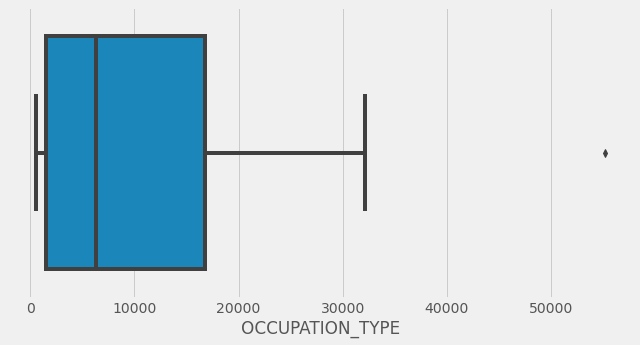

In [15]:
# Checking for outliers using Boxplot
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=[10,5])
sns.boxplot(app_data['OCCUPATION_TYPE'].value_counts())
plt.show()
# The coulmn OCCUPATION_TYPE has outliers, which will impact the mean value. Hence, the column can be imputed using the mode.  


In [16]:
# Finding the mode of column: OCCUPATION_TYPE
app_data.OCCUPATION_TYPE.mode()
# We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

0    Laborers
dtype: object

In [17]:
# Analysing the values of column EXT_SOURCE_3 for finding the value distribution
app_data['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

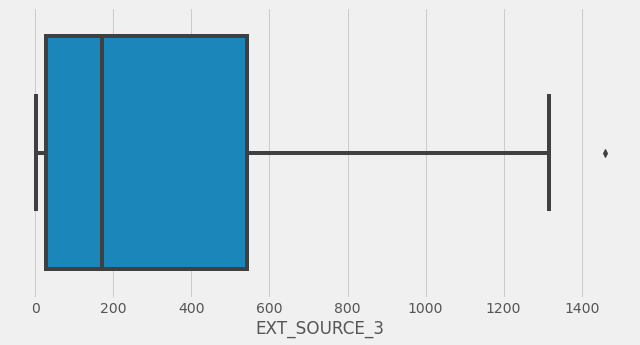

In [18]:
# Checking for outliers using Boxplot
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=[10,5])
sns.boxplot(app_data['EXT_SOURCE_3'].value_counts())
plt.show()
# The coulmn EXT_SOURCE_3 has outliers, which will imlpact the mean value. Hence, the column can be imputed using the mode.  


In [19]:
# Finding the mode of column: EXT_SOURCE_3
app_data.EXT_SOURCE_3.mode()
# We can impute the missing values for the column 'EXT_SOURCE_3' with mode, which is the value '0.7463'

0    0.7463
dtype: float64

### 2.4 Analysing the values of following columns having null value = 14% 

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_QRT
3. AMT_REQ_CREDIT_BUREAU_YEAR
4. AMT_REQ_CREDIT_BUREAU_DAY
5. AMT_REQ_CREDIT_BUREAU_WEEK
6. AMT_REQ_CREDIT_BUREAU_MON


In [20]:
# Analysing the values of columns using value_counts

print(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(),"\n")

print(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(),"\n")

print(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(),"\n")

print(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(),"\n")

print(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(),"\n")

print(app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(),"\n")


0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64 

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64 

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64 

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64 

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20


### 2.5 Creating Boxplots for finding outliers

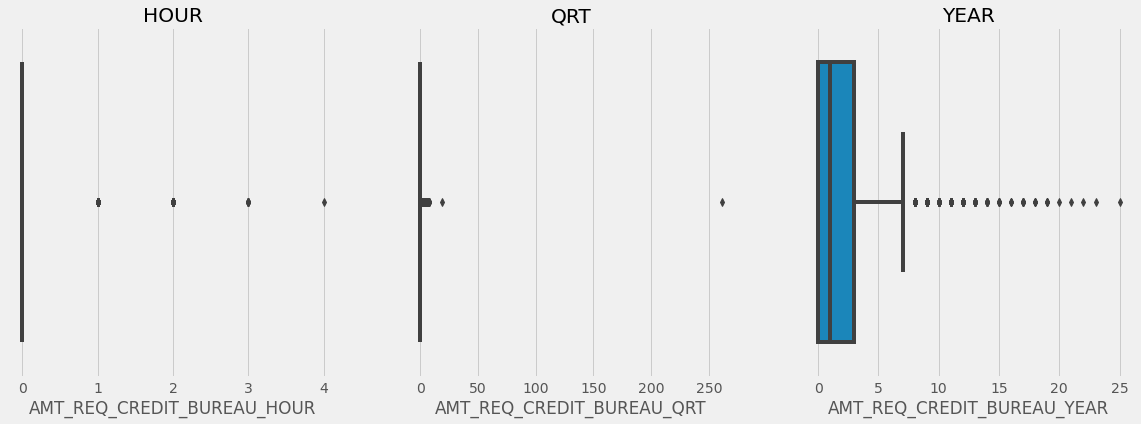

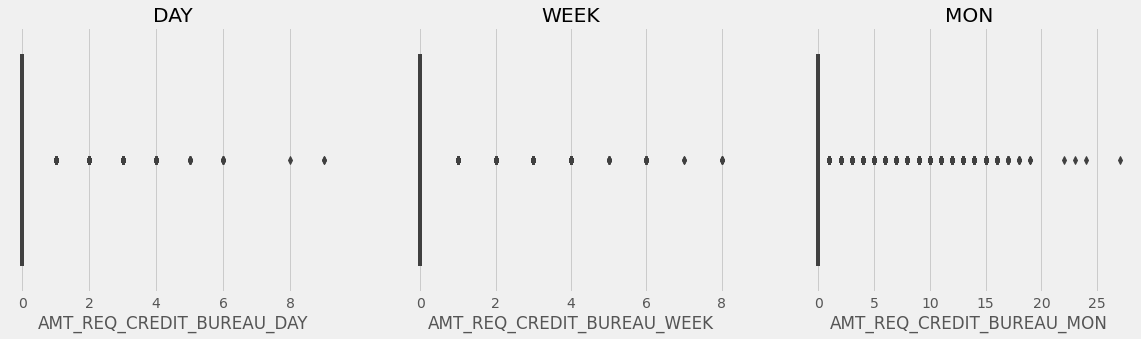

In [21]:
#Ploting the vlues using Boxplot for finding outliers
plt.figure(figsize=(18,6))
plt.style.use('fivethirtyeight') 
plt.subplot(1,3,1)
plt.title('HOUR')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'])
 
plt.subplot(1,3,2)
plt.title('QRT')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_QRT'])
 
plt.subplot(1,3,3)
plt.title('YEAR')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.figure(figsize=(18,10))
plt.style.use('fivethirtyeight')
plt.subplot(2,3,1)
plt.title('DAY')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.subplot(2,3,2)
plt.title('WEEK')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.subplot(2,3,3)
plt.title('MON')
sns.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [22]:
# Finding mode values of the colums

print(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode(),"\n")
print(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode(),"\n")
print(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode(),"\n")


print(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode(),"\n")
print(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode(),"\n")
print(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode(),"\n")


0    0.0
dtype: float64 

0    0.0
dtype: float64 

0    0.0
dtype: float64 

0    0.0
dtype: float64 

0    0.0
dtype: float64 

0    0.0
dtype: float64 



### 2.6 Recommendation for Imputing values:-

From the above analysis, we could find that the following columns can be imputed with value of Mode. 

1. OCCUPATION_TYPE
2. EXT_SOURCE_3
3. AMT_REQ_CREDIT_BUREAU_HOUR
4. AMT_REQ_CREDIT_BUREAU_QRT
5. AMT_REQ_CREDIT_BUREAU_YEAR
6. AMT_REQ_CREDIT_BUREAU_DAY
7. AMT_REQ_CREDIT_BUREAU_WEEK
8. AMT_REQ_CREDIT_BUREAU_MON


### 2.7 Checking and rectifying data types of columns

In [23]:
# Checking the remaining columns in the dataframe
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
# Checking the values of columns starting with 'DAYS' to find whether there is any negative values present in it
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [25]:
# Converting the date columns to postive values using abs() function
app_data['DAYS_BIRTH']=abs(app_data['DAYS_BIRTH'])
app_data['DAYS_EMPLOYED']=abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_REGISTRATION']=abs(app_data['DAYS_REGISTRATION'])
app_data['DAYS_ID_PUBLISH']=abs(app_data['DAYS_ID_PUBLISH'])
app_data['DAYS_LAST_PHONE_CHANGE']=abs(app_data['DAYS_LAST_PHONE_CHANGE'])

In [26]:
# Checking the values after conversion
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [27]:
# Checking the Gender column
app_data['CODE_GENDER'].value_counts()
# No treatment is required as the missing values are very less

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
# Replacing the XNA and XAP are replaced by NaN
app_data=app_data.replace('XNA', np.NaN)
app_data=app_data.replace('XAP', np.NaN)

In [29]:
# Checking the following numerical columns to find outliers

# AMT_INCOME_TOTAL             307511 non-null  float64
# AMT_CREDIT                   307511 non-null  float64
# AMT_ANNUITY                  307499 non-null  float64
# AMT_GOODS_PRICE              307233 non-null  float64


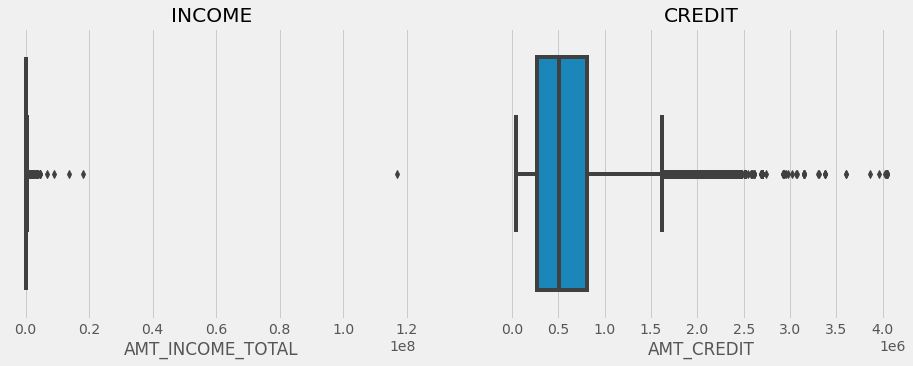

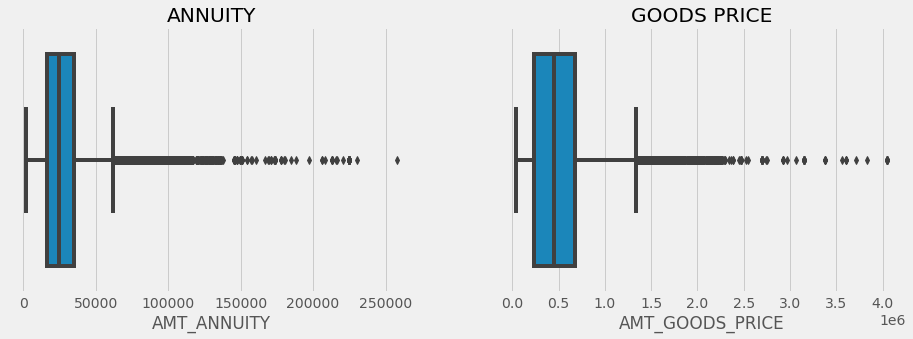

In [30]:
plt.figure(figsize=(30,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,4,1)
plt.title('INCOME')
sns.boxplot(app_data['AMT_INCOME_TOTAL'])

plt.subplot(1,4,2)
plt.title('CREDIT')
sns.boxplot(app_data['AMT_CREDIT'])

plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

plt.subplot(2,4,3)
plt.title('ANNUITY')
sns.boxplot(app_data['AMT_ANNUITY'])

plt.subplot(2,4,4)
plt.title('GOODS PRICE')
sns.boxplot(app_data['AMT_GOODS_PRICE'])

plt.show()

### Inference for numeric columns:- 

After ploting the values in Boxplot, we can infer the following.

#### AMT_INCOME_TOTAL : 
- There is a clear outlier at 11.7M
- Minimal outliers are spreaded until 0.2M

#### AMT_CREDIT : 
- The outliers are concentrated until 2.5M
- Minimal outliers are spreaded from 2.5M till 4M.

#### AMT_ANNUITY : 
- The outliers are concentrated between 60K to 140K.
- Minimal outliers spreaded between 140K till 2.4K.

#### AMT_GOODS_PRICE : 
- The outliers are concentrated between 1.4M to 2.3M.
- Minimal outliers spreaded between 2.3M till 4M.


### 2.8 Binnig of some important colums for analysis

In [31]:
# Categorizing AMT_INCOME_RANGE based on quantiles
app_data['AMT_INCOME_RANGE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [32]:
# Binning 'AMT_CREDIT_RANGE' by creating various credit ranges
app_data['AMT_CREDIT_RANGE'] = pd.qcut(app_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [33]:
# Converting 'DAYS_BIRTH' column to years
app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)

In [34]:
# Checking the values afrer conversion
app_data['DAYS_BIRTH'].unique()


array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [35]:
# Biining the column 'DAYS_BIRTH' based on age ranges for further analysis
app_data['DAYS_BIRTH_BINS']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Teenager','Young', 'Middle_Aged', 'Senior_Citizens'])

In [36]:
# Checking the data distribution after binning
app_data['DAYS_BIRTH_BINS'].value_counts()

Middle_Aged        185900
Young               75925
Senior_Citizens     29368
Teenager            16318
Name: DAYS_BIRTH_BINS, dtype: int64

### 3. Analysing the Data

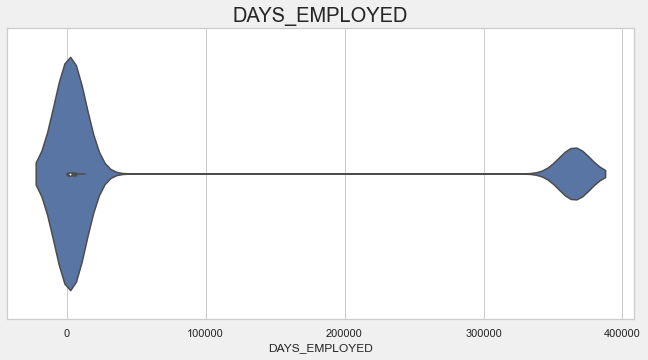

In [37]:
# Checking the column 'DAYS_EMPLOYED' to analyse the data distribution 
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.violinplot(app_data['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

### Inference:-

This column is having data of current employment duration of the applicant. 

From the above chart we can understand that there is a clear outlier in the column `Days_Employed`. Any data beyond 25,000 days will 

Considering the applicant started working at the age of 21, he will be 21+(25000/365)= `75 years`.

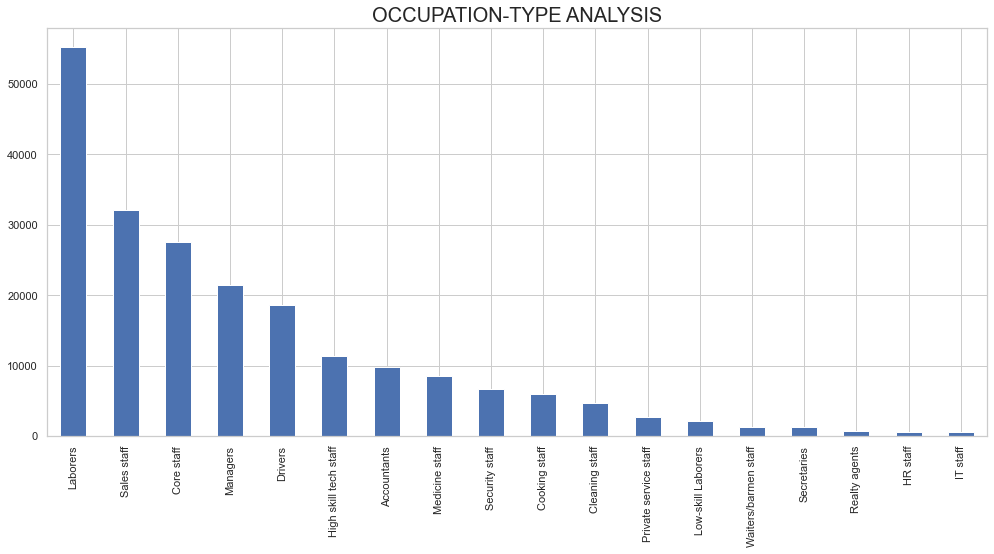

In [38]:
# Checking the value distribution of 'OCCUPATION_TYPE' column

plt.figure(figsize=(15,7))
plt.title("OCCUPATION-TYPE ANALYSIS",fontsize=20)
app_data["OCCUPATION_TYPE"].value_counts().plot(kind='bar')
plt.show()

#### From the analysis, we could infer that the the following are the Top 5  Loan borrower occupation categories.

- Laborers
- Sales staff
- Core staff
- Managers
- Drivers

### 4. Checking imbalance in the target variables

In [39]:
# Checking the values in the target variable
app_data['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

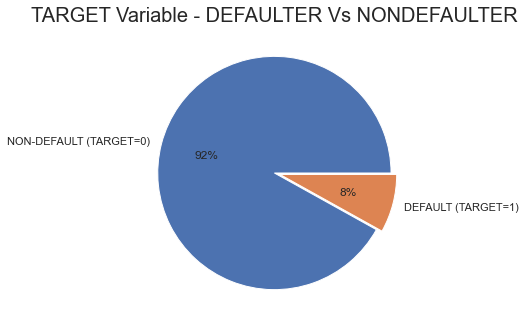

In [40]:
plt.figure(figsize=(10,5))
plt.pie(app_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER',fontsize=20)
plt.show()

#### Inference
- The percentage of people who have not defaulted is more than 92%
- The percentage of people who have defaulted is 8% 

### 4.1. Splitting the dataframe based on target variable

In [41]:
# The orignal datframe is divided into two different dataframes based on the target value
non_default = app_data.loc[app_data.TARGET == 0]
default = app_data.loc[app_data.TARGET == 1]

### 4.2. Performing univariate analysis

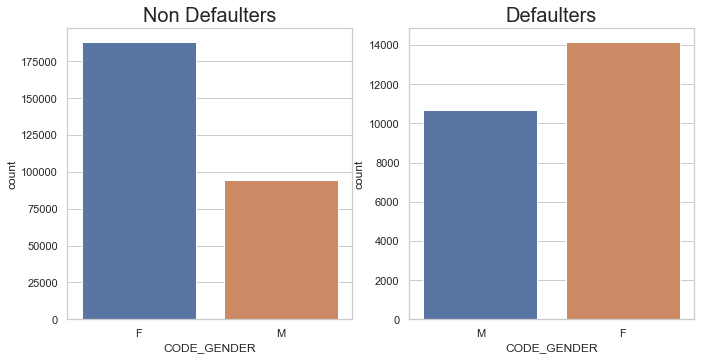

In [42]:
# Comparing the gender distribution between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
sns.countplot(x='CODE_GENDER',data=non_default)

plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
sns.countplot(x='CODE_GENDER',data=default)

plt.show()

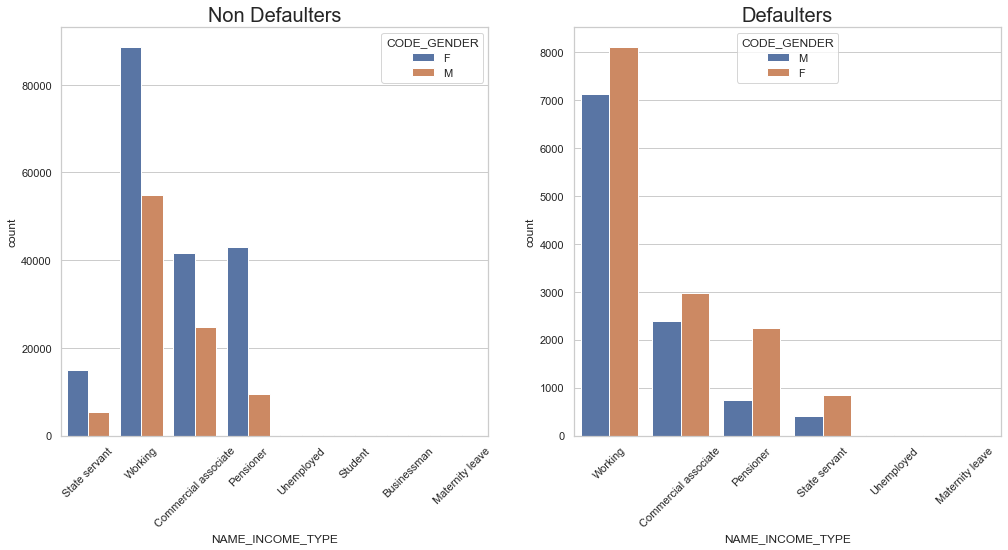

In [43]:
# Comparing the income type between `Defaulters` and `Non-defaulters`

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

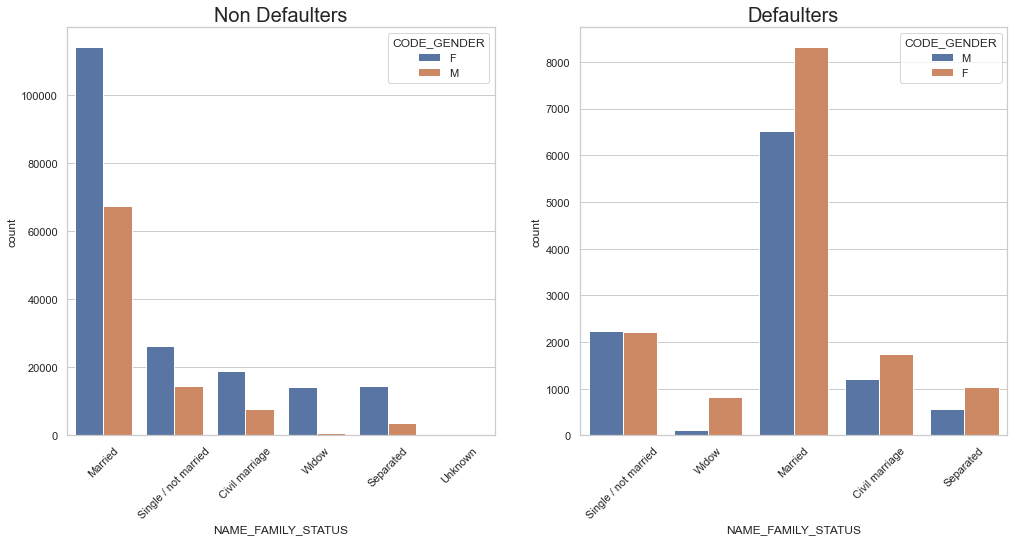

In [44]:
# Comparing the family status between `Defaulters` and `Non-defaulters`

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_FAMILY_STATUS',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_FAMILY_STATUS',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

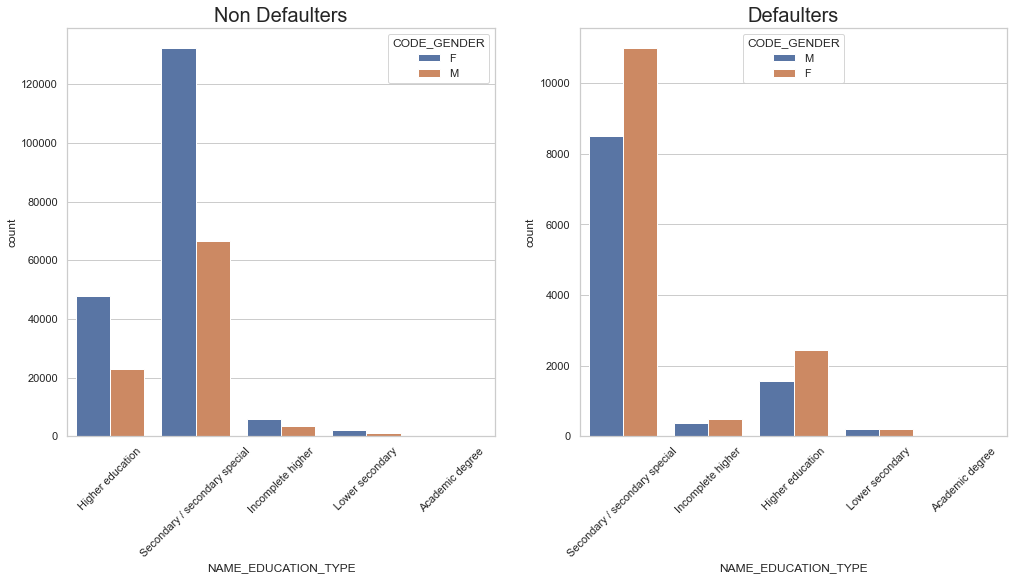

In [45]:
# Comparing the education type between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

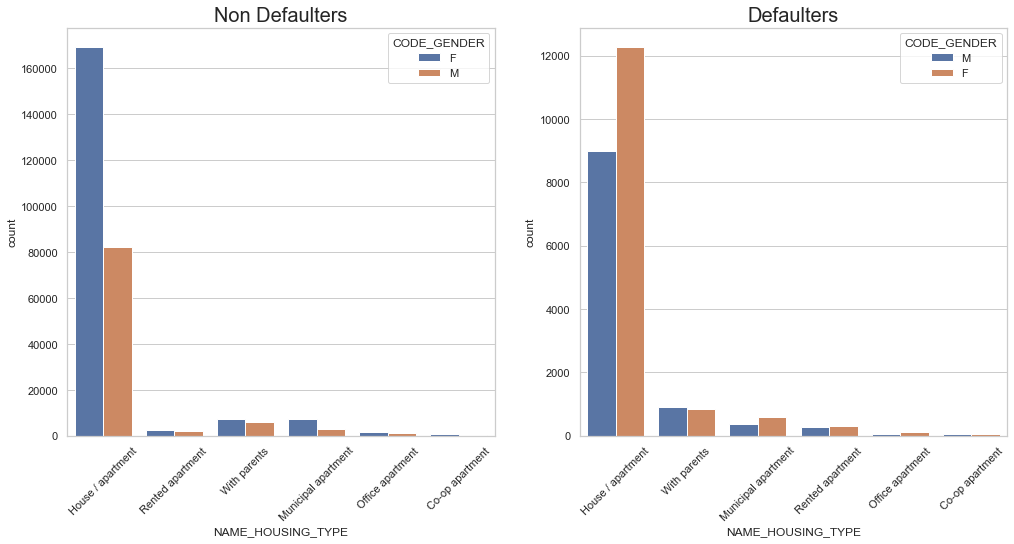

In [46]:
# Comparing the housing type between `Defaulters` and `Non-defaulters`

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_HOUSING_TYPE',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_HOUSING_TYPE',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

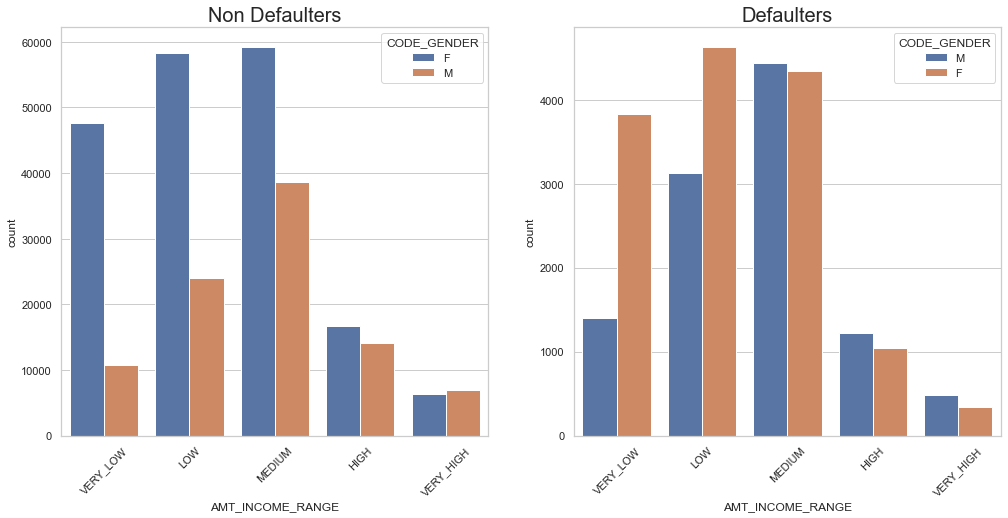

In [47]:
# Comparing the income range between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='AMT_INCOME_RANGE',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='AMT_INCOME_RANGE',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

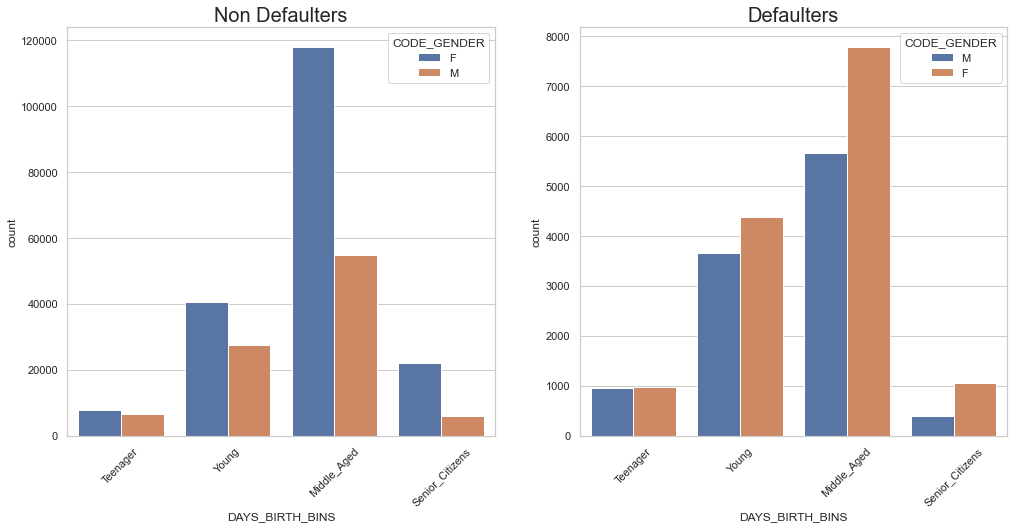

In [48]:
# Comparing the age range between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='DAYS_BIRTH_BINS',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='DAYS_BIRTH_BINS',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

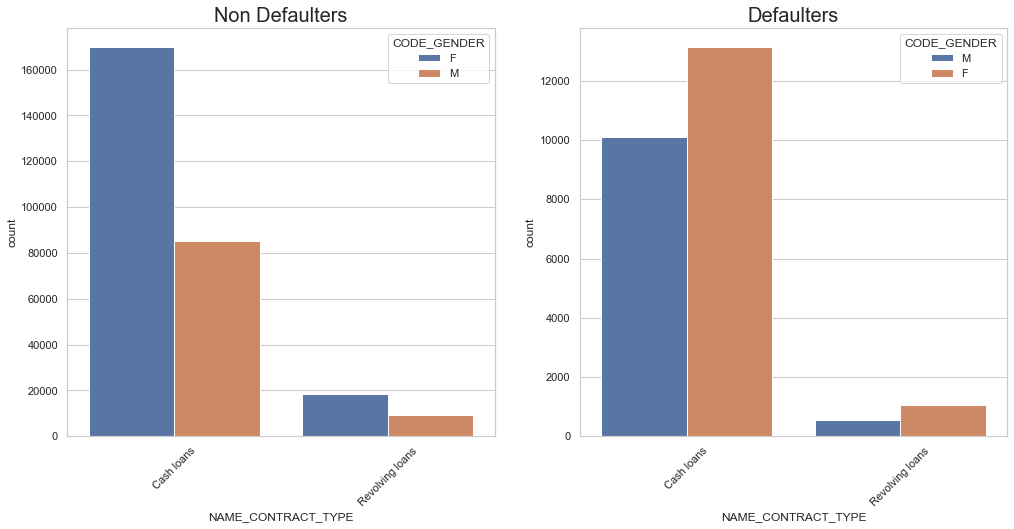

In [49]:
# Comparing the loan type between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

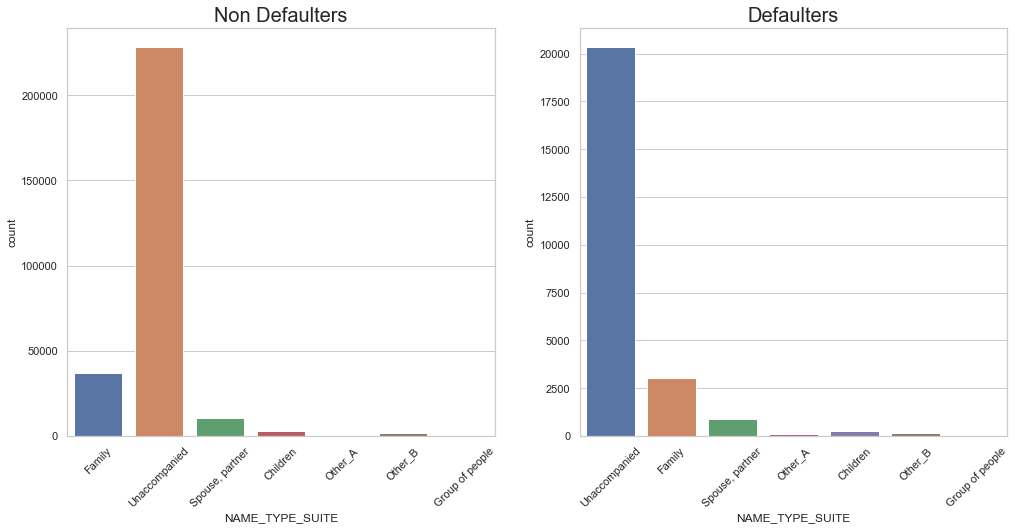

In [50]:
# Comparing the individual accompanied while applying for loan between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_TYPE_SUITE',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='NAME_TYPE_SUITE',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

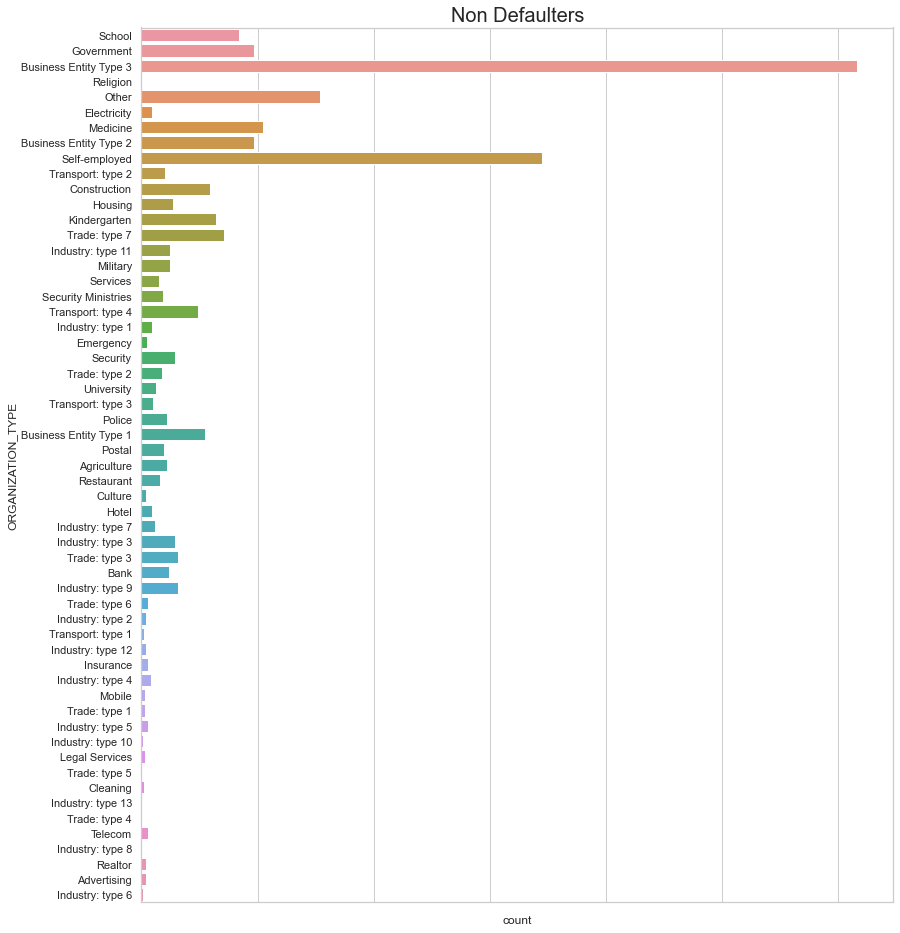

In [51]:
# Checking the organization type distribution of `Non-defaulters`
plt.figure(figsize=(12,15))
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(y='ORGANIZATION_TYPE',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

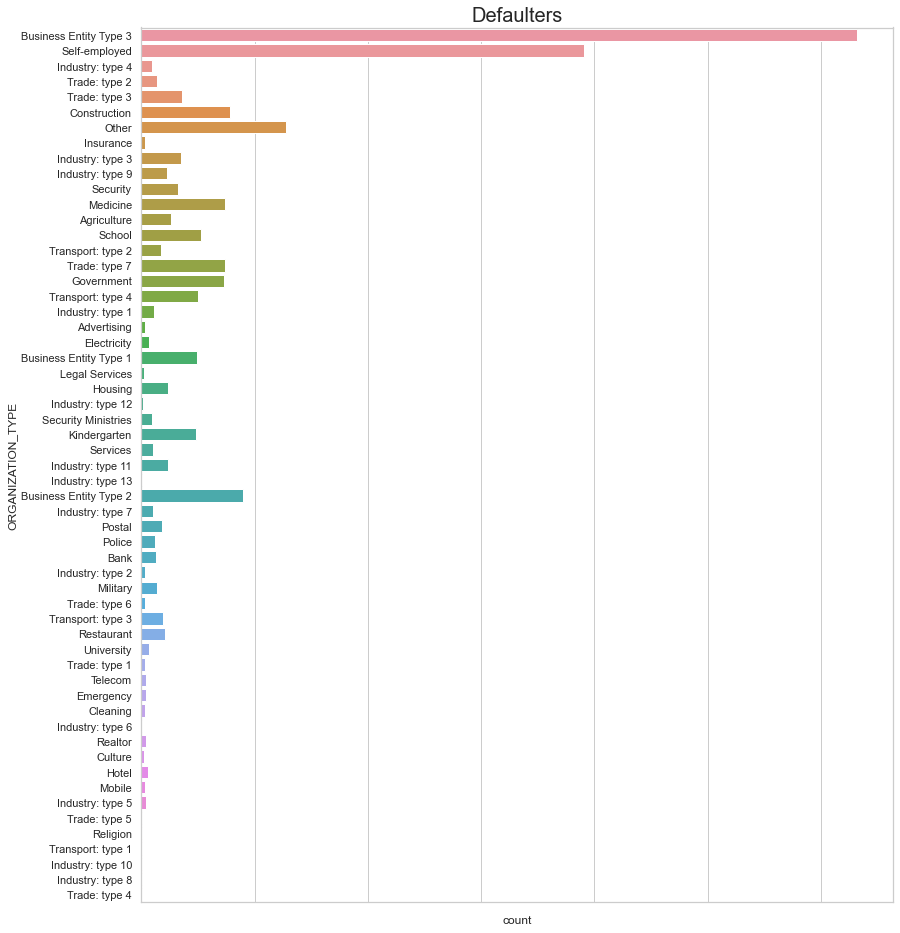

In [52]:
# Checking the organization type distribution of `defaulters`
plt.figure(figsize=(12,15))
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(y='ORGANIZATION_TYPE',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

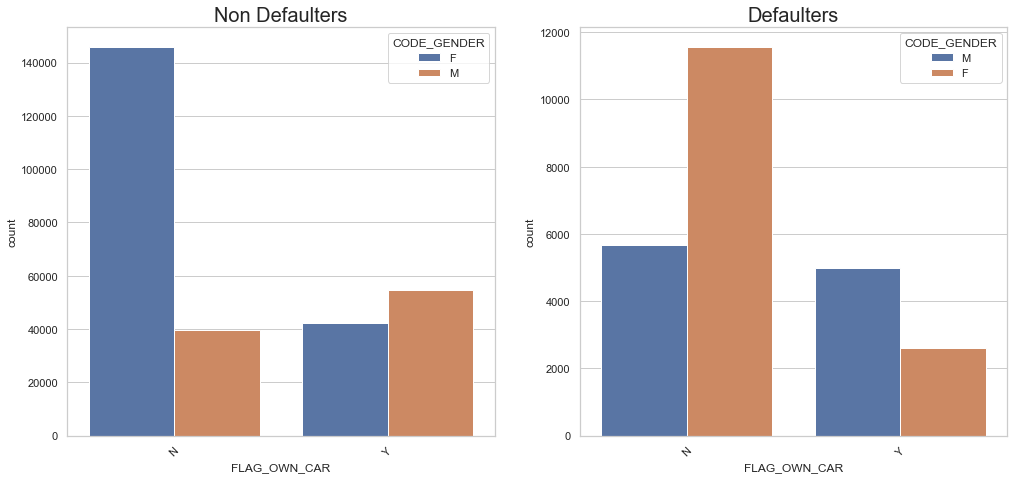

In [53]:
# Comparing the car ownership status between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='FLAG_OWN_CAR',data=non_default,hue='CODE_GENDER')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='FLAG_OWN_CAR',data=default,hue='CODE_GENDER')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

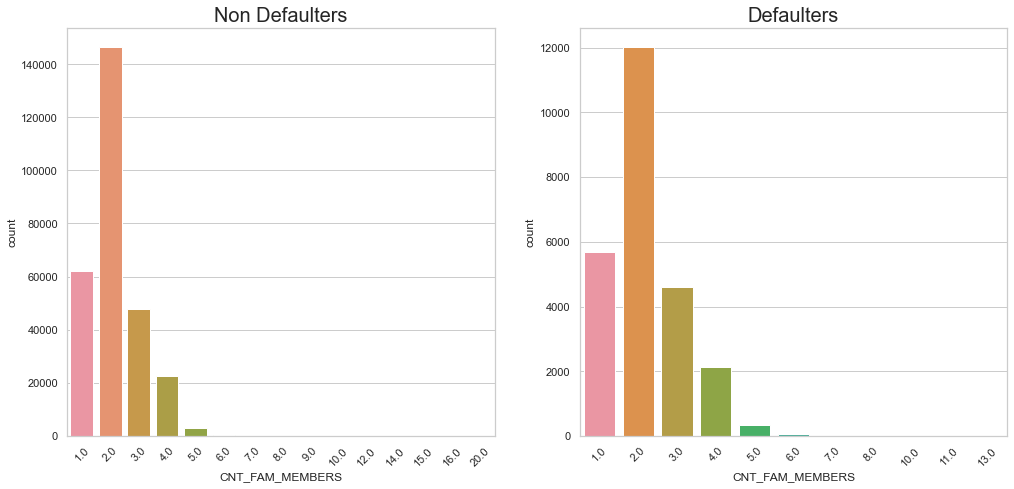

In [54]:
# Comparing the count of family members between `Defaulters` and `Non-defaulters`
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Non Defaulters',fontsize=20)
chart=sns.countplot(x='CNT_FAM_MEMBERS',data=non_default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.subplot(1,2,2)
plt.title('Defaulters',fontsize=20)
chart=sns.countplot(x='CNT_FAM_MEMBERS',data=default)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### 4.3 Bivariate Analysis

#### 4.3.1 Bivariate Analysis for Target = 0 (Non-Defaulters)

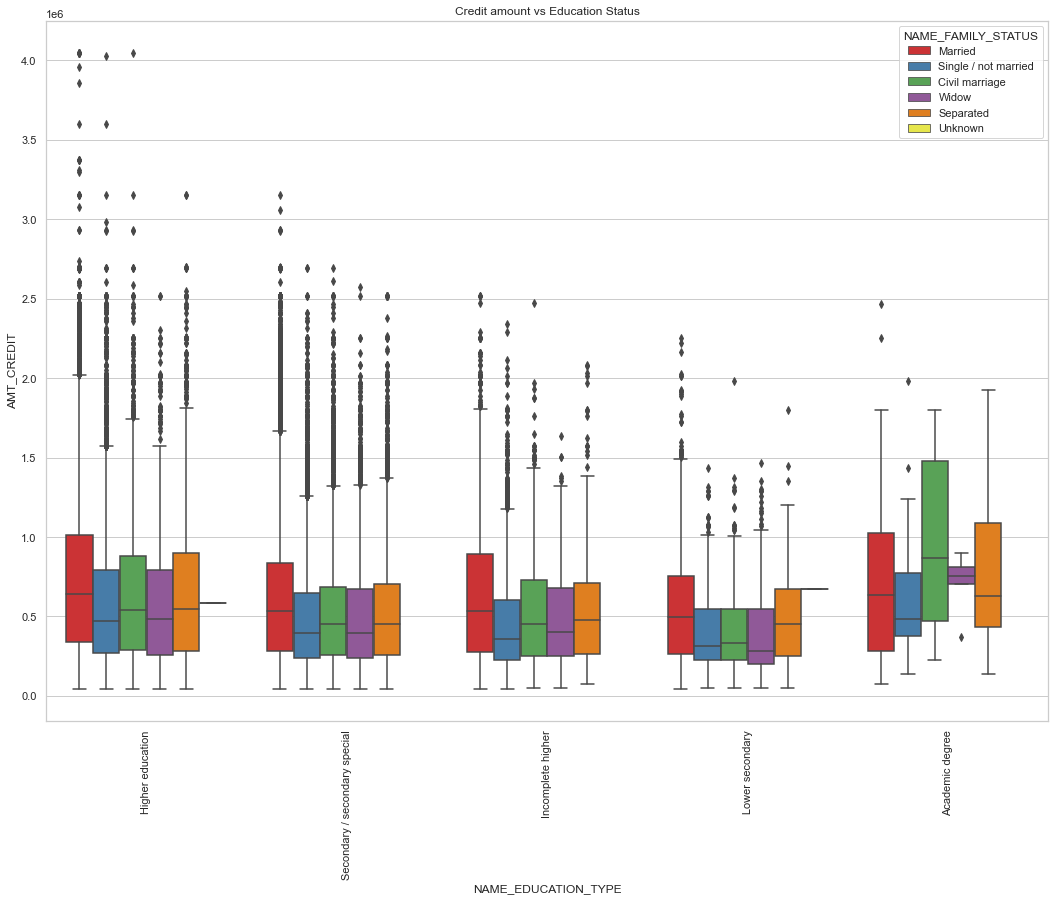

In [55]:
# Creating Box plot for analysing the credit amount Vs education status
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette="Set1")
plt.title('Credit amount vs Education Status')
plt.show()

Obervations:-

More credit is given to category higher education having family status of 'civil marriage', 'marriage' and 'separated'.

More outliers are seen in higher education having family status of 'marriage', 'single' and 'civil marriage.

Civil marriage for Academic degree is having most of the credits in the third quartile.

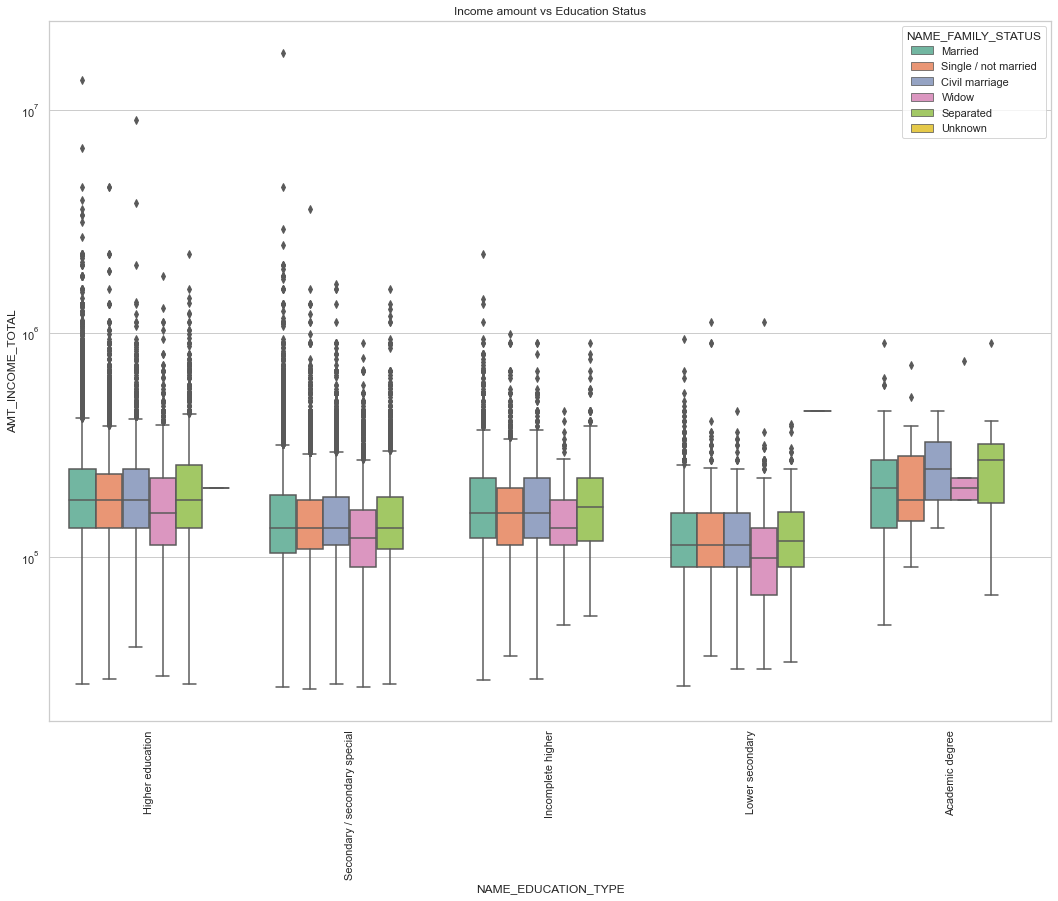

In [56]:
# Creating Box plot for analysing the income total Vs education status
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette="Set2")
plt.title('Income amount vs Education Status')
plt.show()

Observations:-

The income amount is equally distributed in Education type 'Higher education' among all family status.

Academic degree is having less outlier but there income amount is little higher that Higher education.

Civil marriage family status having Lower secondary education are have less income than others.

#### 4.3.2 Bivariate Analysis for Target = 1 (Defaulters)

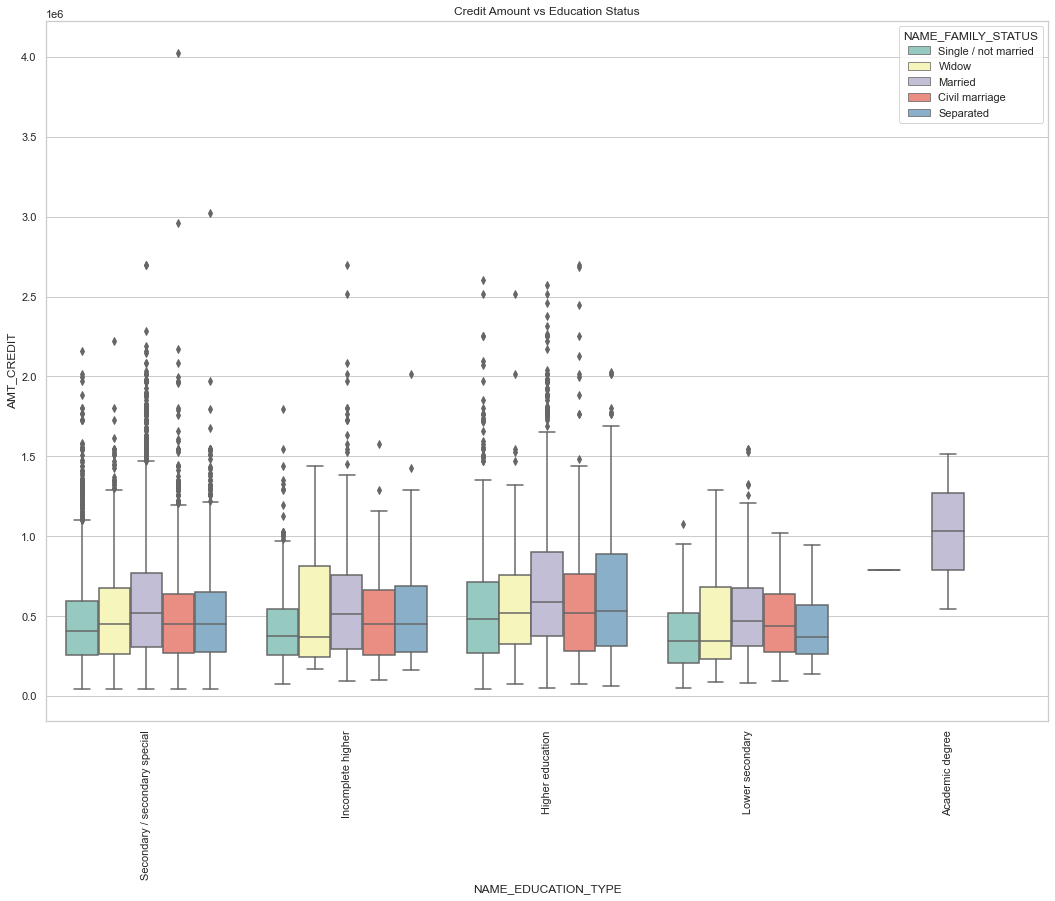

In [57]:
# Creating Box plot for analysing the credit amount Vs education status
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette="Set3")
plt.title('Credit Amount vs Education Status')
plt.show()

Observations:-

Family status of 'civil marriage', 'marriage' and 'separated' of `higher` education are having higher number of credits than others.

Most of the outliers are from Education type 'Higher education' and 'Secondary'.

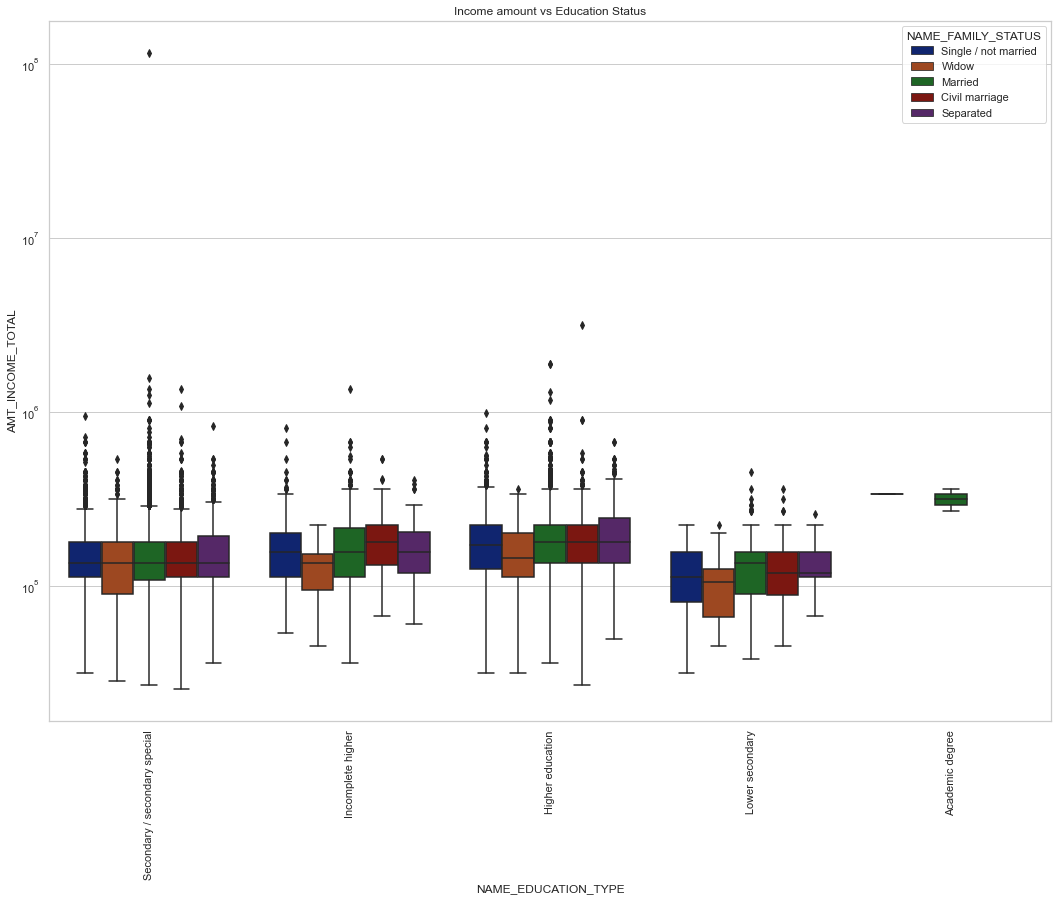

In [58]:
# Creating Box plot for analysing the income Vs education status
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette="dark")
plt.title('Income amount vs Education Status')
plt.show()

Observations:-

The income amount is equally distributed among all family status in Higher education category.

Lower secondary education category is having less income compared to others.

### 4.4 Finding correlation between columns  for Non-Defaulters

In [59]:
# Heatmap for Target = 0 (Non-Defaulters)
T0=non_default[[
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
]].corr(method = 'pearson')


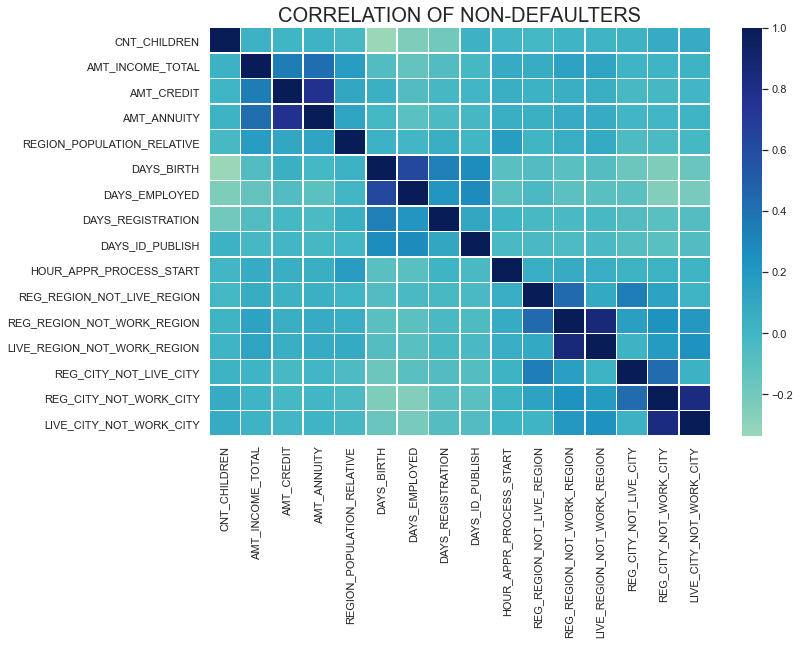

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(T0,center=0,linewidths=.5,cmap="YlGnBu")
plt.title("CORRELATION OF NON-DEFAULTERS",fontsize=20)
plt.show()

Observations:-

Credit amount is higher for low age and vice-versa.

Credit amount is higher for clients having lower number of children.

Income is more for clients having less number of children

### 4.5 Finding correlation between columns for Defaulters

In [61]:
# Heatmap for Target = 1 (Defaulters)
T1=default[[
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
]].corr(method = 'pearson')

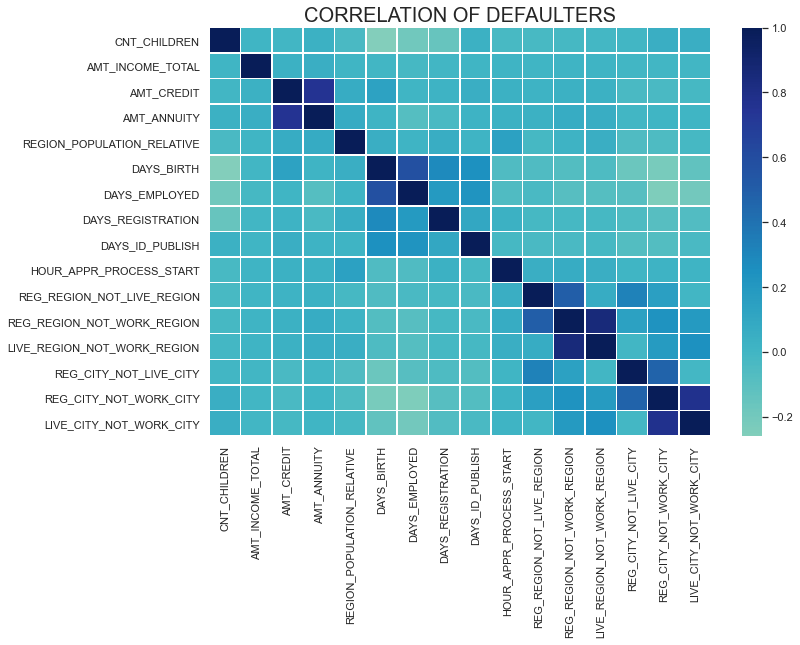

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(T1,center=0,linewidths=.5,cmap="YlGnBu")
plt.title("CORRELATION OF DEFAULTERS",fontsize=20)
plt.show()

Almost similar observations as first map

### 4.6 Bivariate Analysis Numerical Variables


### Analysing for Non-Defaulters

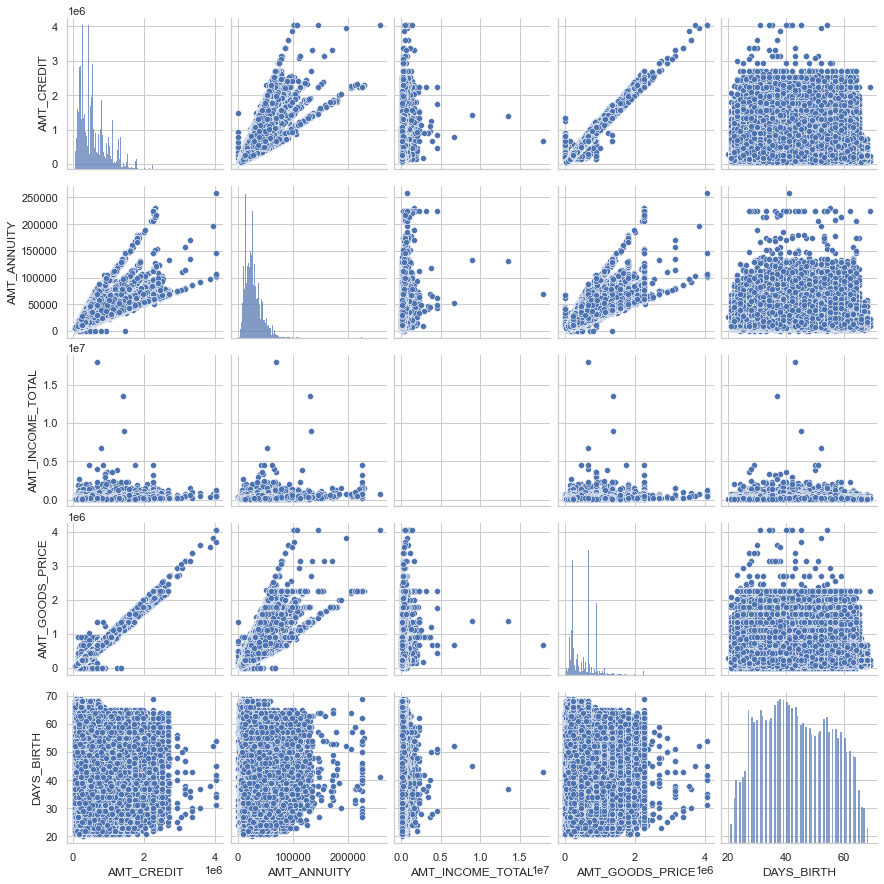

In [63]:
#Pairplot for Target 0 (Non=Defaulters)
pair = non_default[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show()

### Analysing for Defaulters

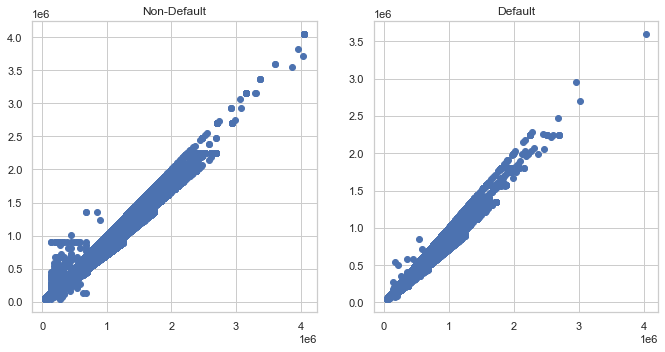

In [64]:
# Analysing credit amount vs goods price for Non-defaulters and Defaulters
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Default')
plt.scatter(non_default['AMT_CREDIT'],non_default['AMT_GOODS_PRICE'])

plt.subplot(1,2,2)
plt.title('Default')
plt.scatter(default['AMT_CREDIT'],default['AMT_GOODS_PRICE'])
plt.show()

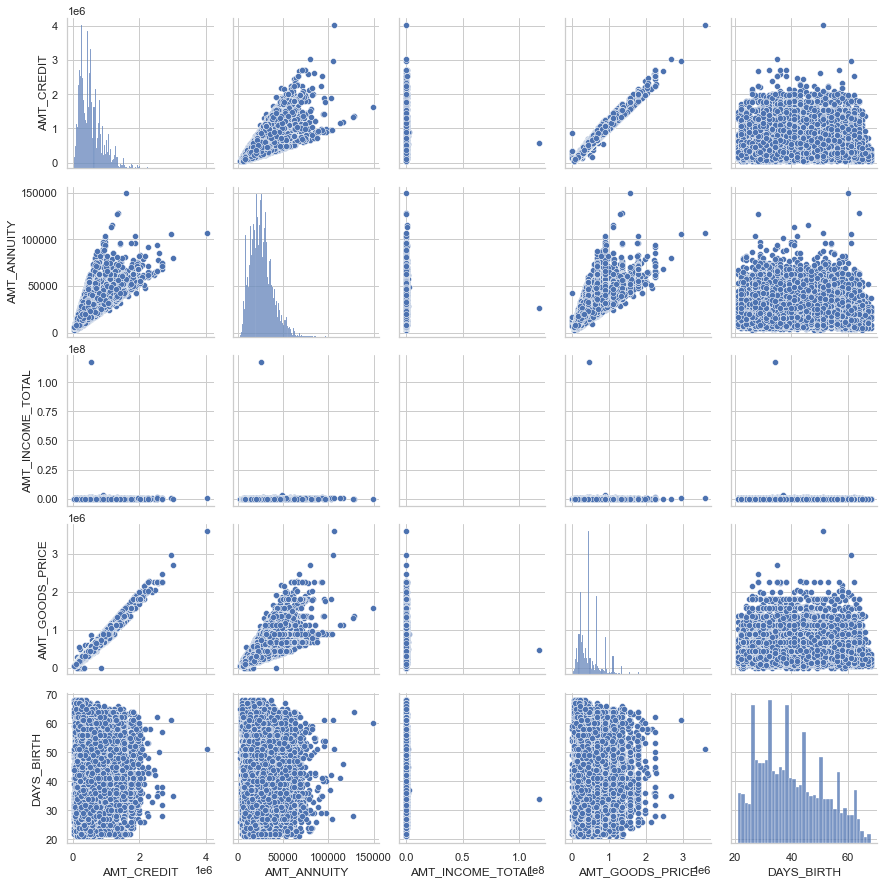

In [65]:
#Pairplot for Target 1 (Defaulters)
pair = default[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)
plt.show()

### 5. Loading data to the dataframe - app_data_prv for inspection and correction


In [66]:
# Reading the dataset from local directory
prv_app_data = pd.read_csv("previous_application.csv")

### 5.1 Inspecting the dataframe for understandng the structure and value distributions

In [67]:
# Displaying all columns of data using set_option
pd.set_option('display.max_columns',122)
prv_app_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Finding the distribution of data for numeric columns
prv_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [69]:
# Checking the number of rows and columns in the data set
prv_app_data.shape

(1670214, 37)

In [70]:
# Finding the datatypes using dataframe info command
prv_app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [71]:
# Finding the percentage of null values in each column and sorting the result in descending order to find out the null value distribution

prv_null_val = round(prv_app_data.isnull().sum()/len(prv_app_data)*100).sort_values(ascending=False).head(55)
prv_null_val

RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
RATE_DOWN_PAYMENT               54.0
AMT_DOWN_PAYMENT                54.0
NAME_TYPE_SUITE                 49.0
DAYS_TERMINATION                40.0
NFLAG_INSURED_ON_APPROVAL       40.0
DAYS_FIRST_DRAWING              40.0
DAYS_FIRST_DUE                  40.0
DAYS_LAST_DUE_1ST_VERSION       40.0
DAYS_LAST_DUE                   40.0
AMT_GOODS_PRICE                 23.0
CNT_PAYMENT                     22.0
AMT_ANNUITY                     22.0
NAME_CONTRACT_TYPE               0.0
AMT_APPLICATION                  0.0
SK_ID_CURR                       0.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
AMT_CREDIT                       0.0
NAME_PAYMENT_TYPE                0.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
CODE_REJECT_REASON               0.0
N

#### From analysing the data by arranging in descending order, we could infer that there are many columns having null values, the maximum being 100%. 

#### As greater number of null values will affect our analysis, the columns which are having >= 30% null values shall be dropped.

In [72]:
# Collecting the column names having nullvalues >=30% in a list
prv_null_val = list(prv_null_val[prv_null_val.values>= 30].index)
print(len(prv_null_val))

11


In [73]:
# Changing the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in prv_app_data if col.startswith('DAYS')]
prv_app_data[filter_col]= abs(prv_app_data[filter_col])

In [74]:
# Checking data after correction
prv_app_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Replacing the XNA and XAP are replaced by NaN
prv_app_data=prv_app_data.replace('XNA', np.NaN)
prv_app_data=prv_app_data.replace('XAP', np.NaN)

In [76]:
# Value counts of Contract Status in previous application
prv_app_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

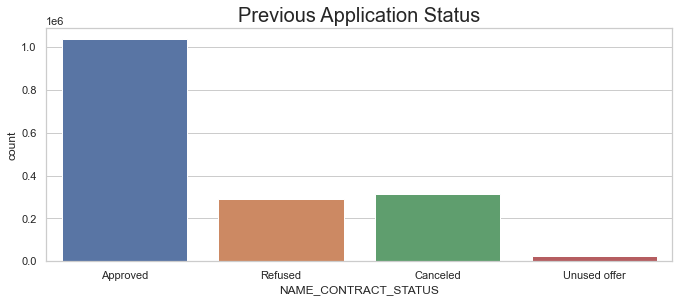

In [77]:
# Analysing previous application status
plt.figure(figsize=(10,4))
plt.title('Previous Application Status',fontsize=20)
sns.countplot(x='NAME_CONTRACT_STATUS',data=prv_app_data)
plt.show()

Observation - Most of the loans and approved and we have a very less unused offer.

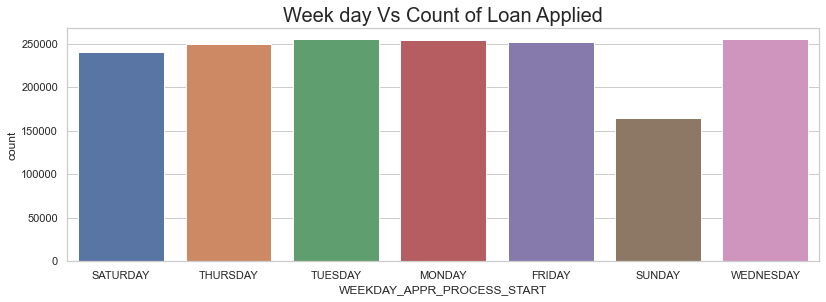

In [78]:
# Loan applied days analysis 
plt.figure(figsize=(12,4))
plt.title('Week day Vs Count of Loan Applied',fontsize=20)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',data=prv_app_data)
plt.show()

The number of applicants are very less on week-ends

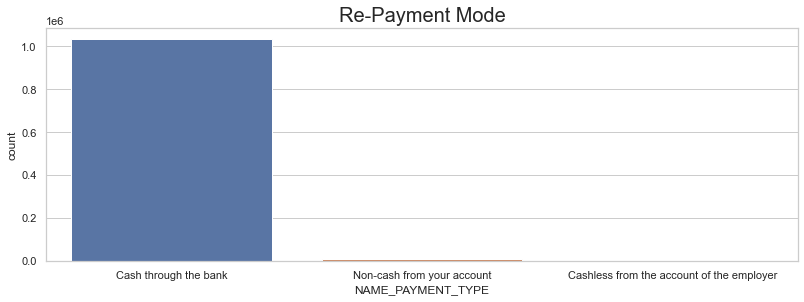

In [79]:
# Loan Re-Payment type analysis 
plt.figure(figsize=(12,4))
plt.title('Re-Payment Mode',fontsize=20)
sns.countplot(x='NAME_PAYMENT_TYPE',data=prv_app_data)
plt.show()

Good percentage (~99) of clients prefer to pay cash through bank.

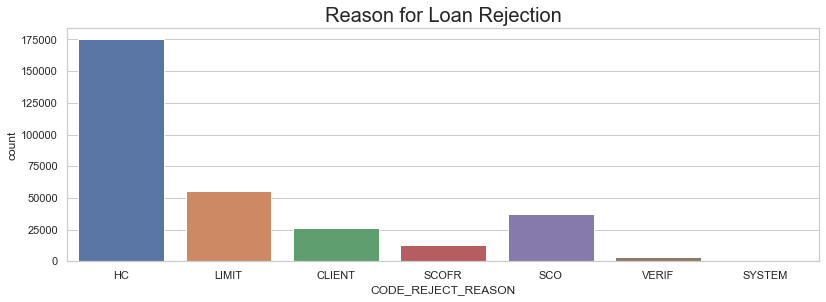

In [80]:
# Analysing Loan rejection reason 
plt.figure(figsize=(12,4))
plt.title('Reason for Loan Rejection',fontsize=20)
sns.countplot(x='CODE_REJECT_REASON',data=prv_app_data)
plt.show()

The major reason for loan rejection in HC - Histocial cost.

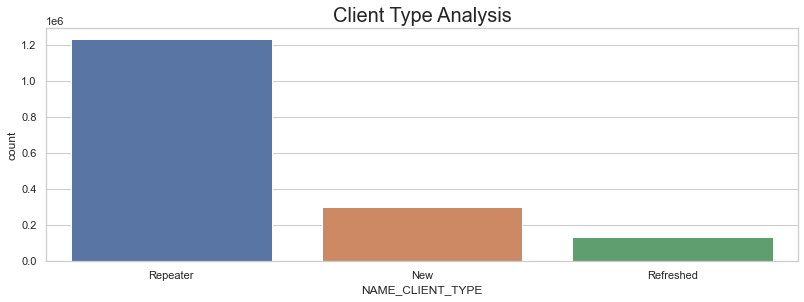

In [81]:
# Client type analysis 
plt.figure(figsize=(12,4))
plt.title('Client Type Analysis',fontsize=20)
sns.countplot(x='NAME_CLIENT_TYPE',data=prv_app_data)
plt.show()

Majority of the clients are repeters as per the graph.

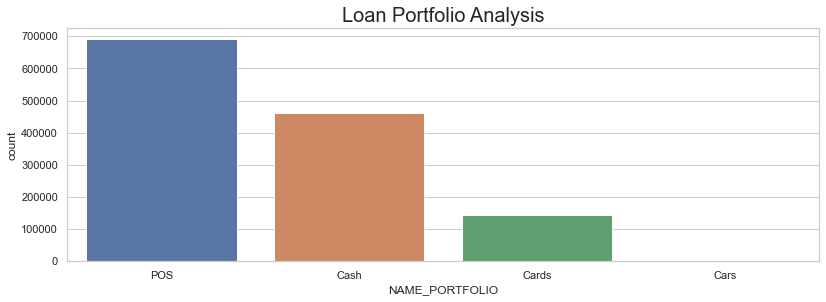

In [82]:
# Loan portfolio analysis 
plt.figure(figsize=(12,4))
plt.title('Loan Portfolio Analysis',fontsize=20)
sns.countplot(x='NAME_PORTFOLIO',data=prv_app_data)
plt.show()

We observe that majority of previous application is for POS and a good amount of it is for cash.

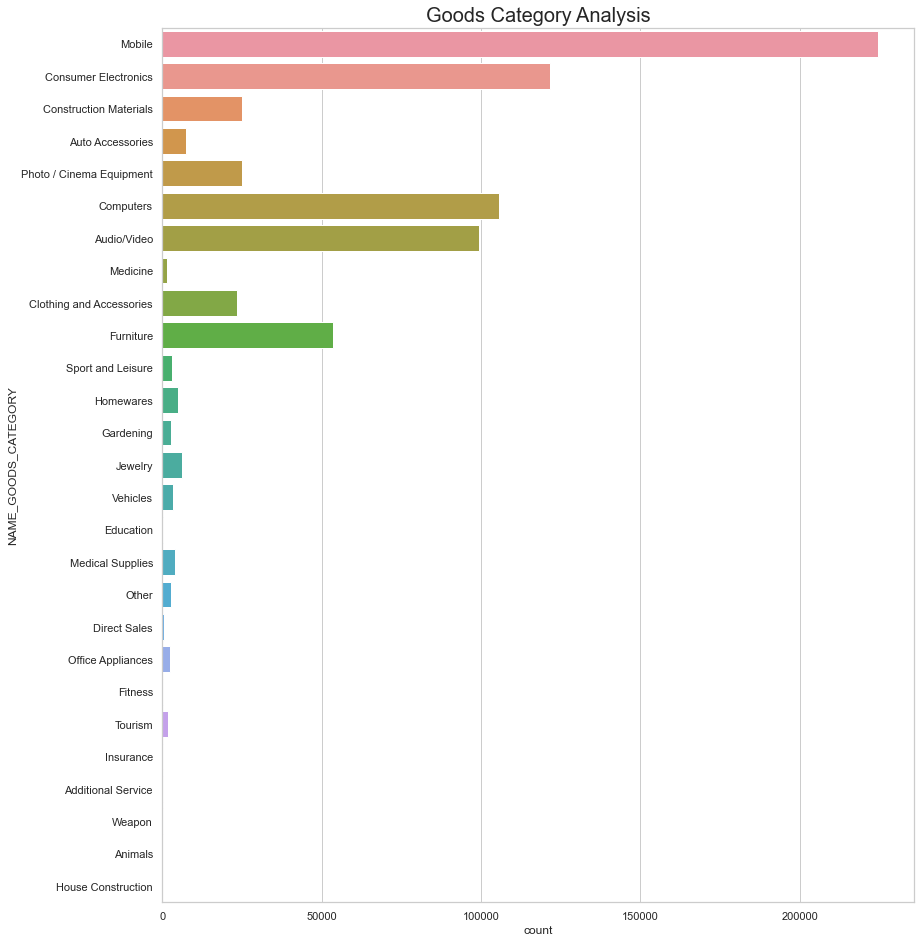

In [83]:
# Analysing the goods category for which the loan was applied 
plt.figure(figsize=(12,15))
plt.title('Goods Category Analysis',fontsize=20)
sns.countplot(y='NAME_GOODS_CATEGORY',data=prv_app_data)
plt.show()

Observation:- Majority of loans are applied for Mobiles, Consumer electronics, Computers and Furnitures.

#### Univariate Analysis

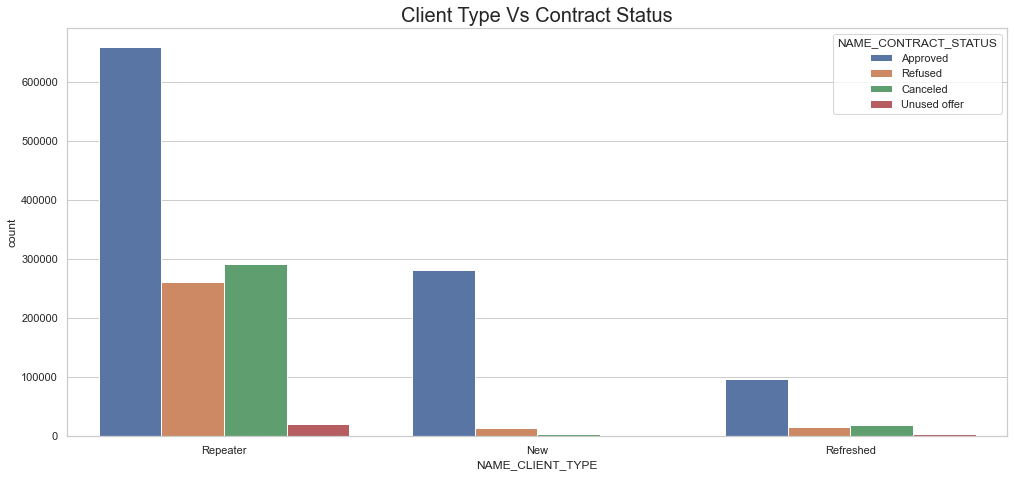

In [84]:
# Anaysing client type Vs contract status
plt.figure(figsize=(15,7))
plt.title('Client Type Vs Contract Status',fontsize=20)
chart=sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=prv_app_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.show()

 Repeat customes are applying for loan again.
 Most of the new and Refreshed applications are approved.

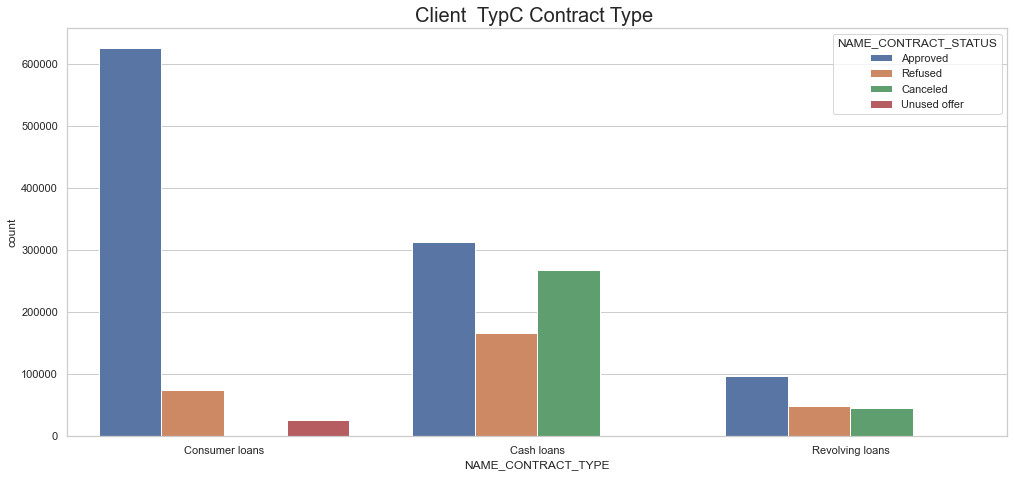

In [85]:
plt.figure(figsize=(15,7))
plt.title('Client  TypC Contract Type ',fontsize=20)
chart=sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=prv_app_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.show()

Most of the applications are for Consumer loans, followed by Cash and Revolving loans.
The rejection rate is more for Cash loans.

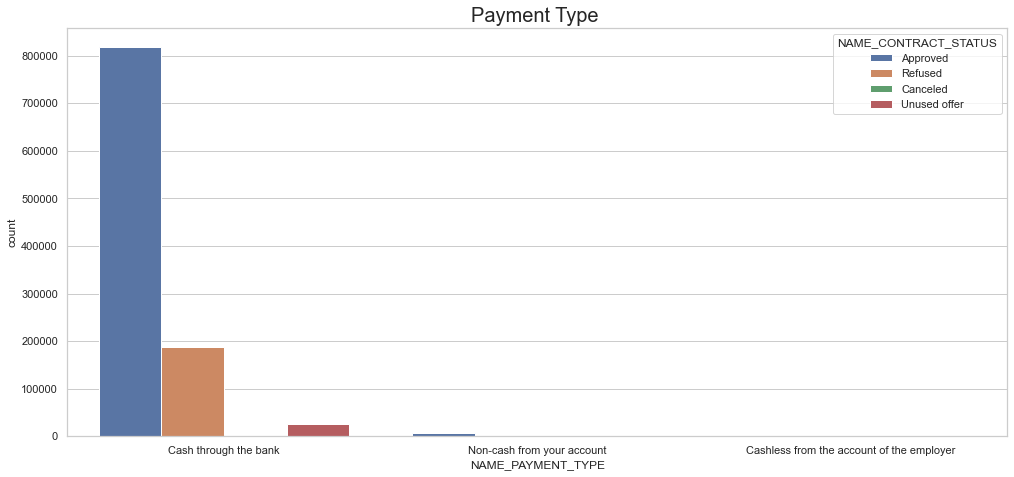

In [86]:
# Anaysing payment type VS contract status
plt.figure(figsize=(15,7))
plt.title('Payment Type ',fontsize=20)
chart=sns.countplot(x='NAME_PAYMENT_TYPE',hue='NAME_CONTRACT_STATUS',data=prv_app_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.show()

The most preferred payment option is Cash through bank.
The other options are not popular at all.

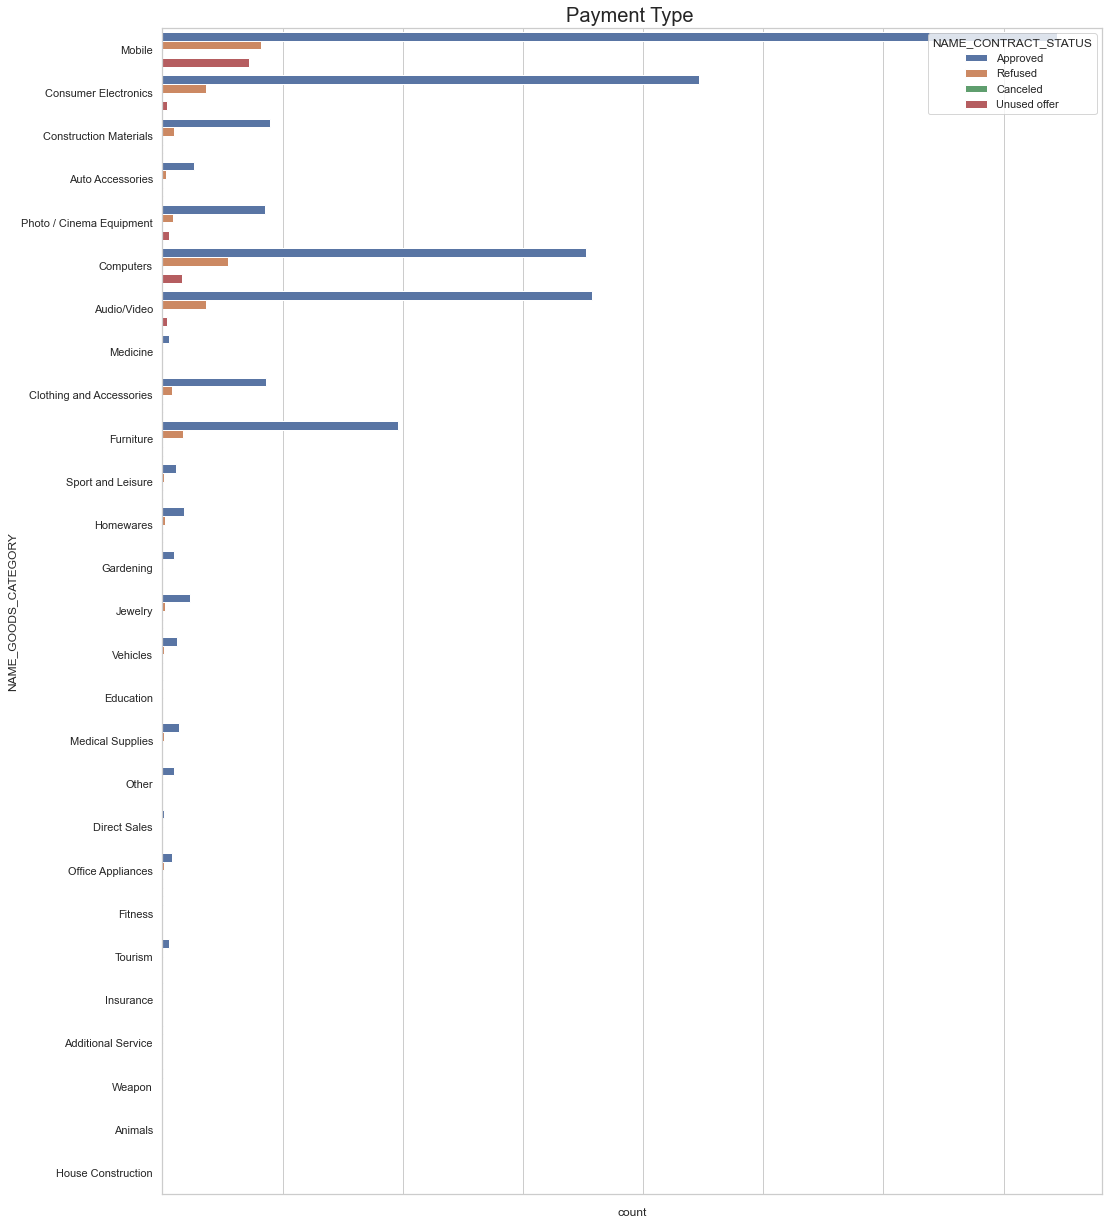

In [87]:
plt.figure(figsize=(15,20))
plt.title('Payment Type ',fontsize=20)
chart=sns.countplot(y='NAME_GOODS_CATEGORY',hue='NAME_CONTRACT_STATUS',data=prv_app_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

Majority of loans are for mobiles, consumer electronics, computers and furnitures.
We have a considerable rejection rate for this categories as well.

## 6. Merging both the data sets

In [88]:
# Merging the current application dataset with previous appliaction dataset

df_merge=pd.merge(left=app_data,right=prv_app_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [89]:
df_merge.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_BINS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,MEDIUM,LOW,Teenager,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,606.0,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,Middle_Aged,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,746.0,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,Middle_Aged,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,828.0,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State ser

In [90]:
# Renaming few colums with appropriate prefix to make it more reable.

df_merge1 = df_merge.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [91]:
# Removing some un-wanted columns from the dataframe for further analysis

df_merge1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

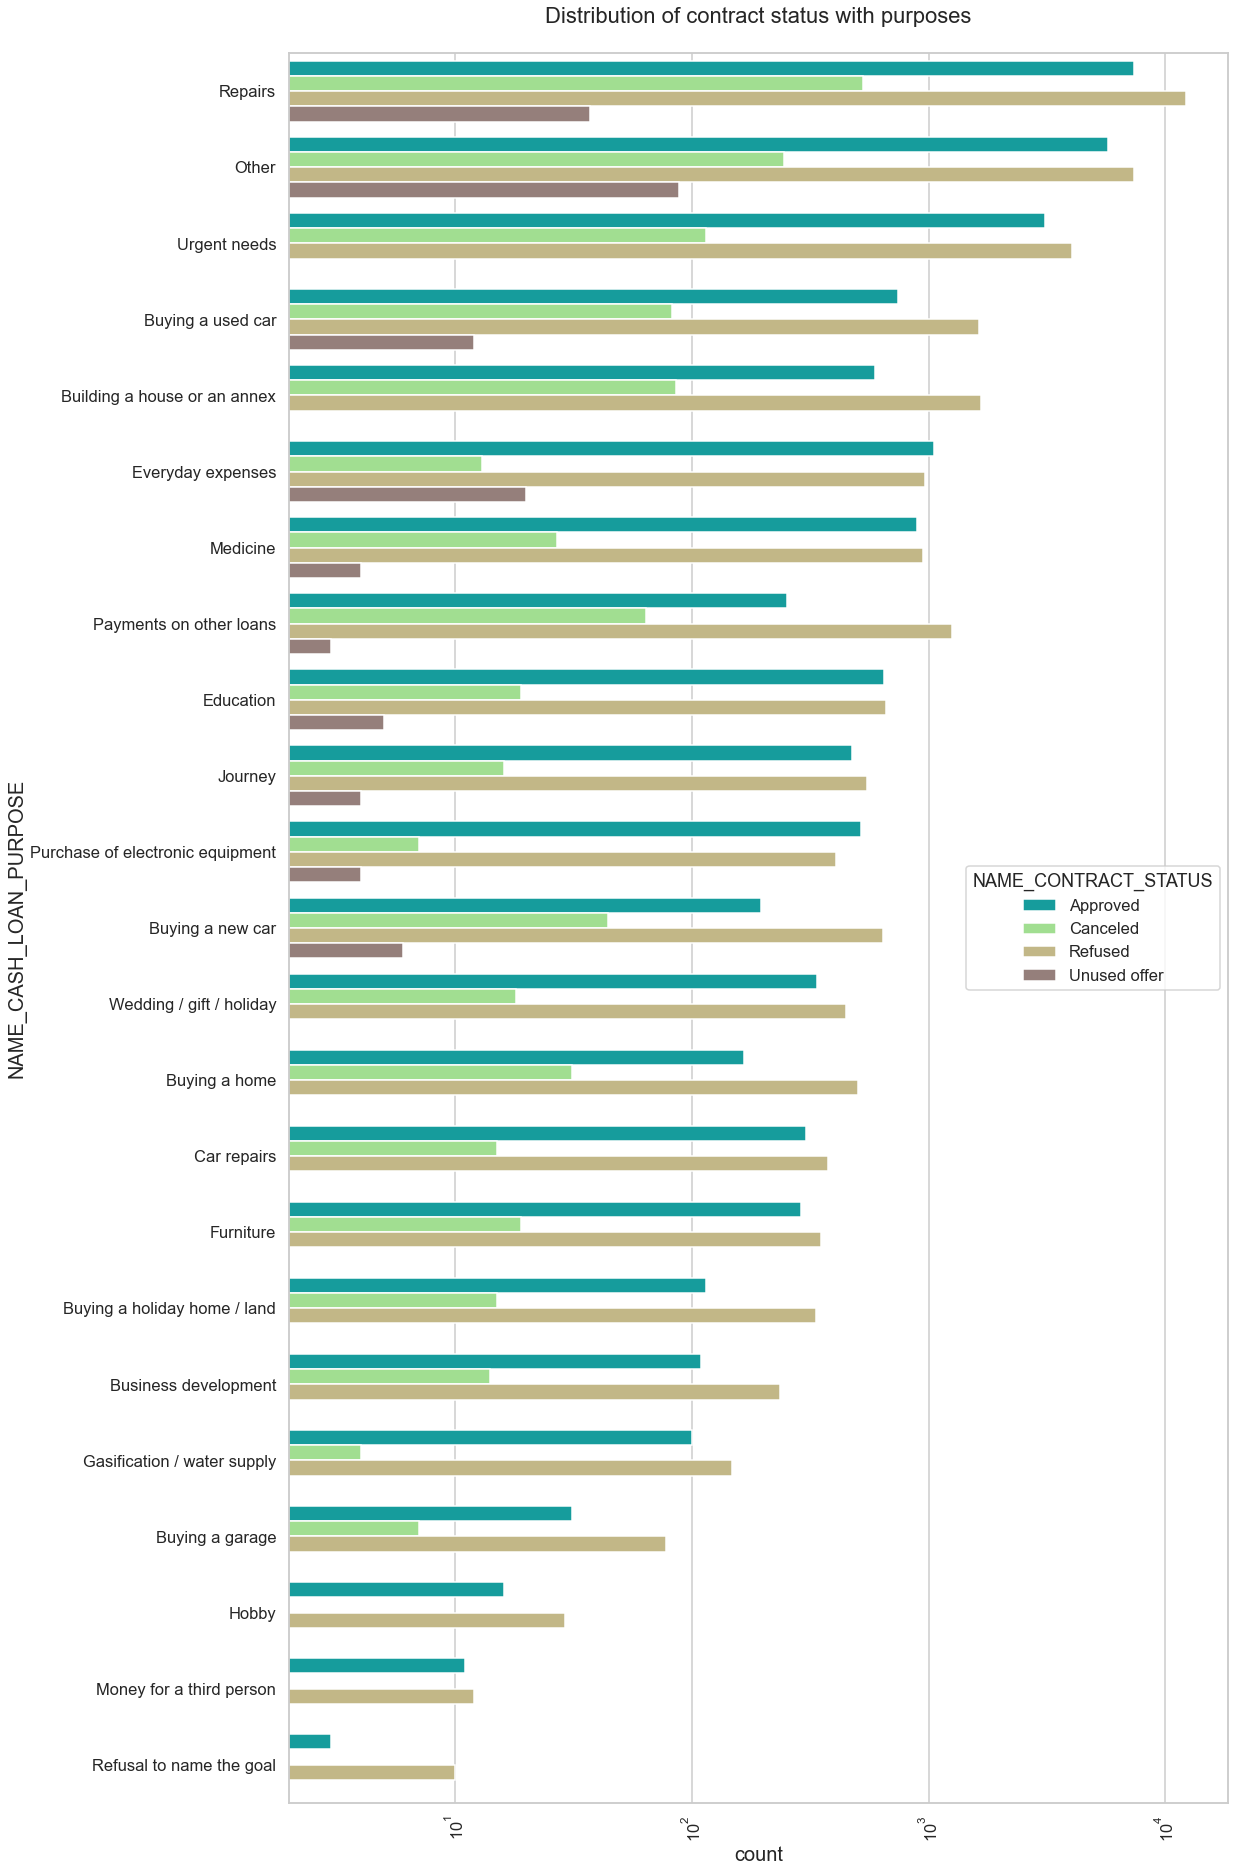

In [92]:
# Plotting distribution status vs purposes

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_merge1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merge1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='terrain') 

Observations:-

Loans taken for 'repairs' are rejected more often
Education loans are having 50% approvals and 50% rejections
Loans taken for payign existing loans andfor buying a new car is having significant higher rejection rate

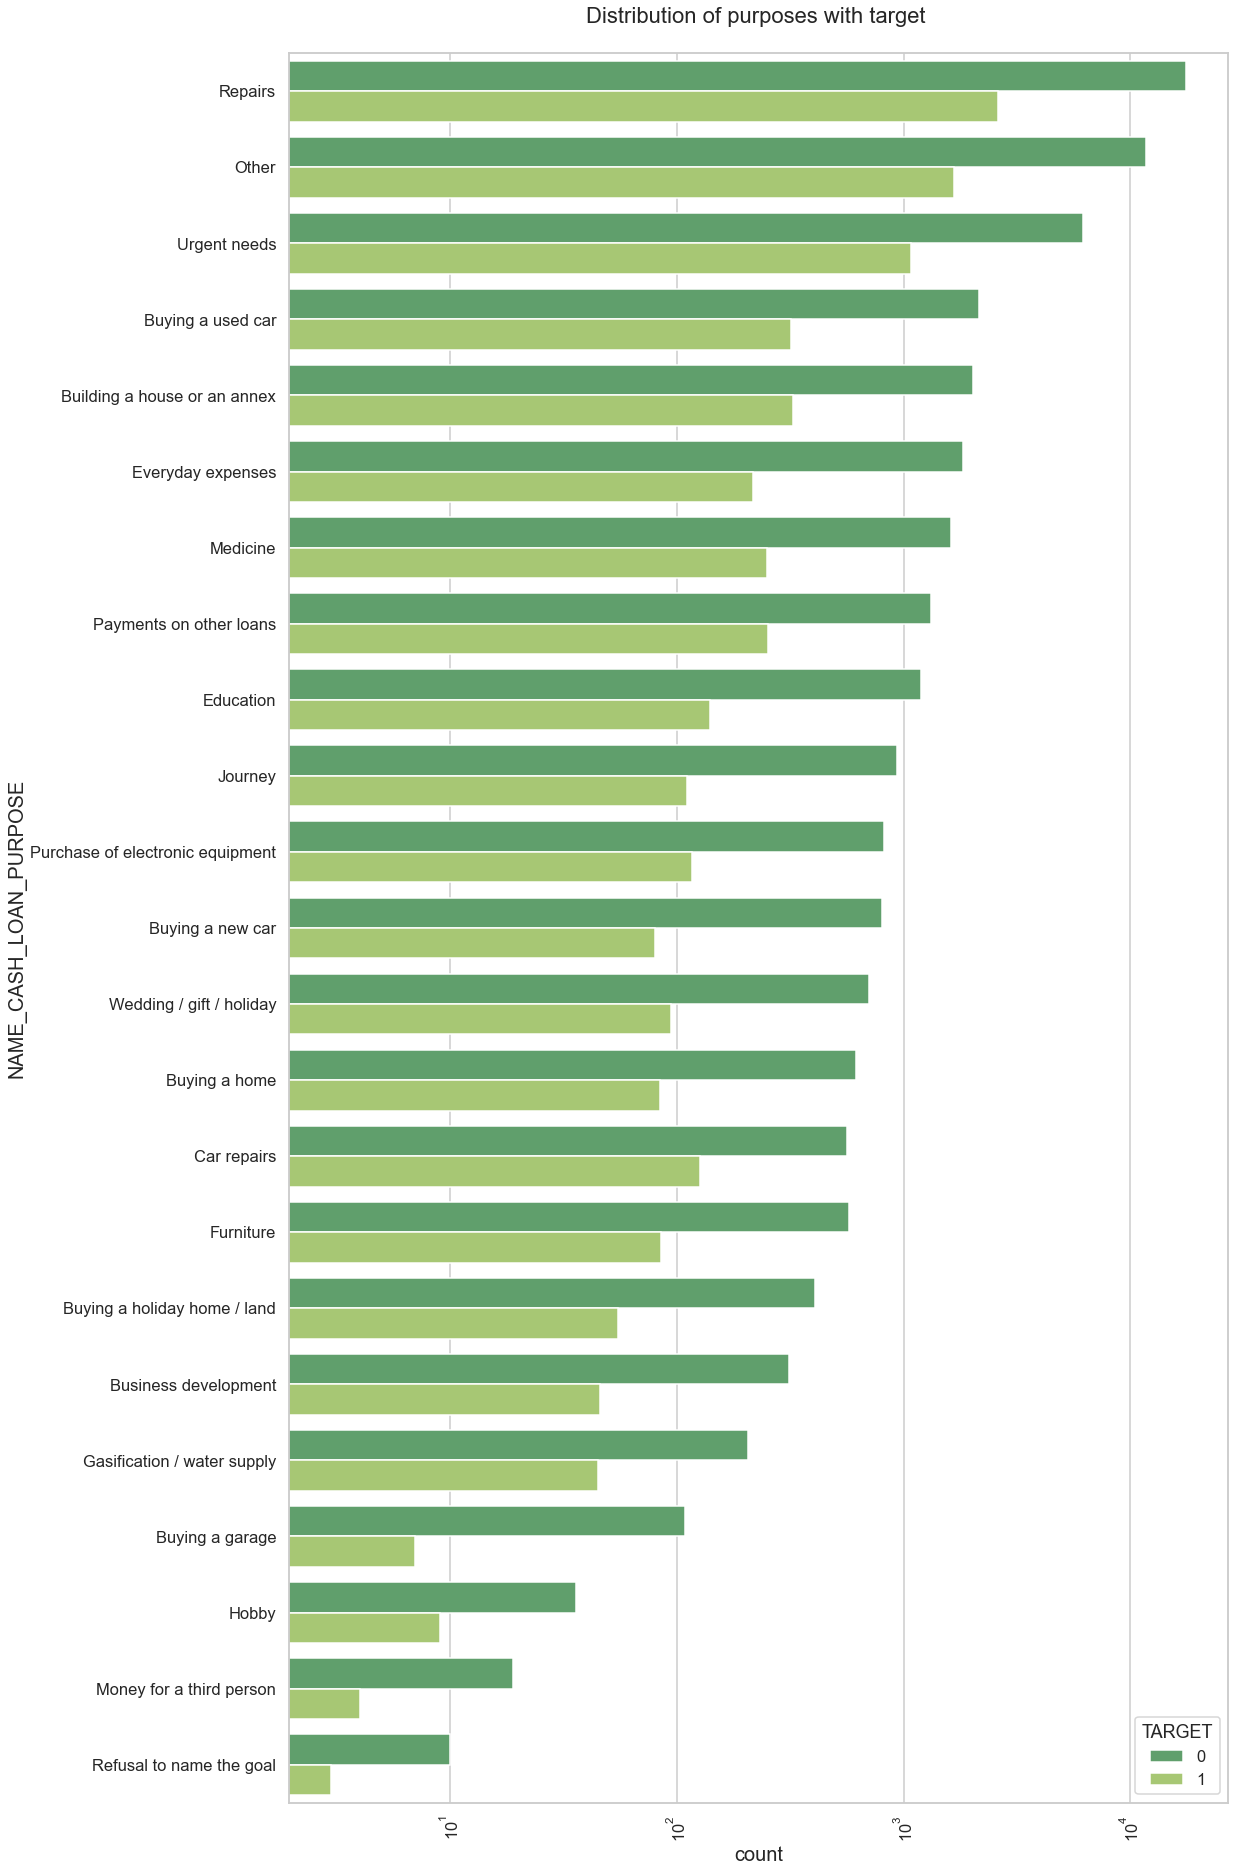

In [93]:
# Plotting cash loan purpose

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df_merge1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merge1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='summer') 

Observattions:-

Categories with payment difficulties include 'Repairs' and 'others'
Categories where the loan payment is on a higher rate is 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

#### Performing bivariate analysis

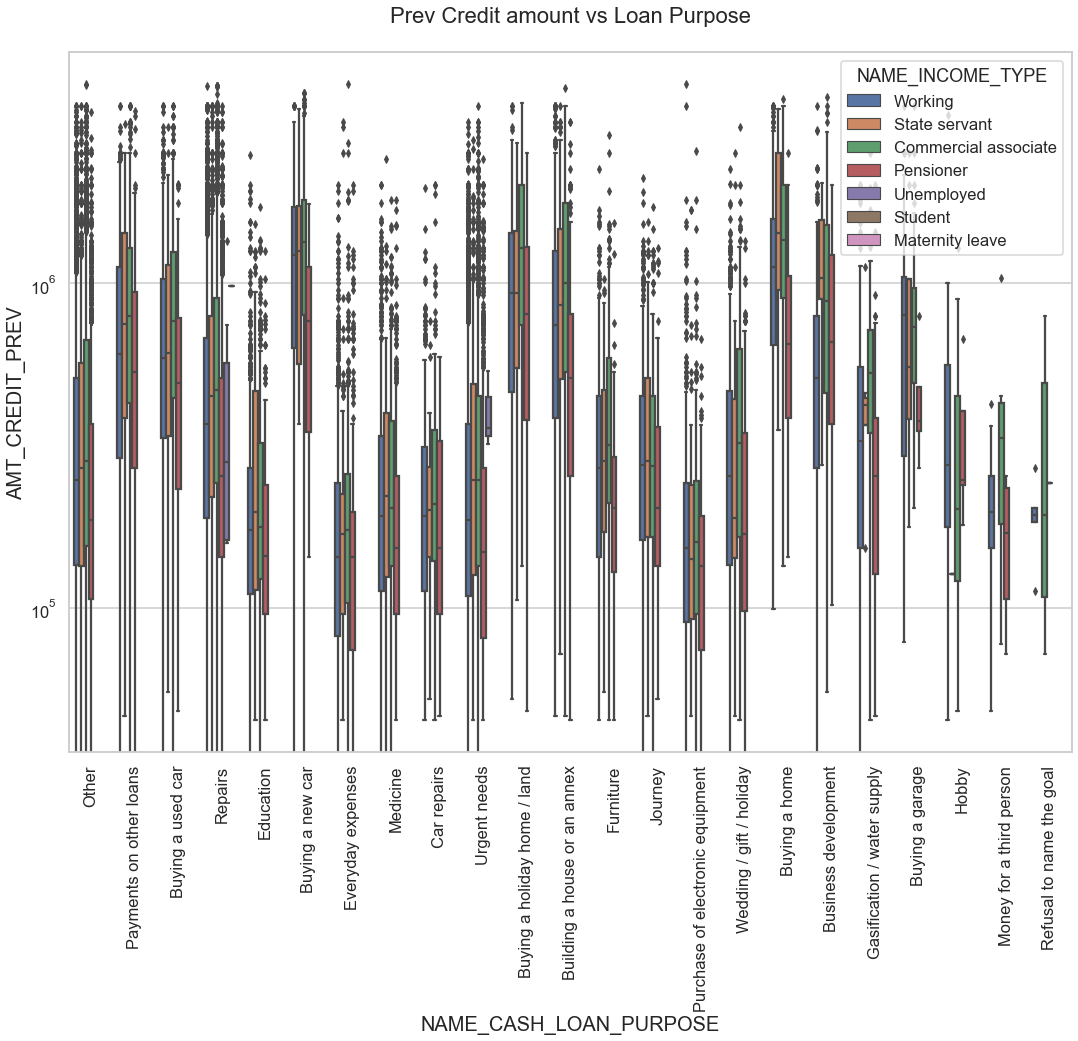

In [94]:
# Creating a Box plot for analysing Credit amount Vs Loan purpose

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_merge1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Observations:-

1. The credit amount is higher for Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house'
2. Government employees having a higher credit compared to other categories
3. Loan applied for Money for third person or a Hobby is having lesser credits

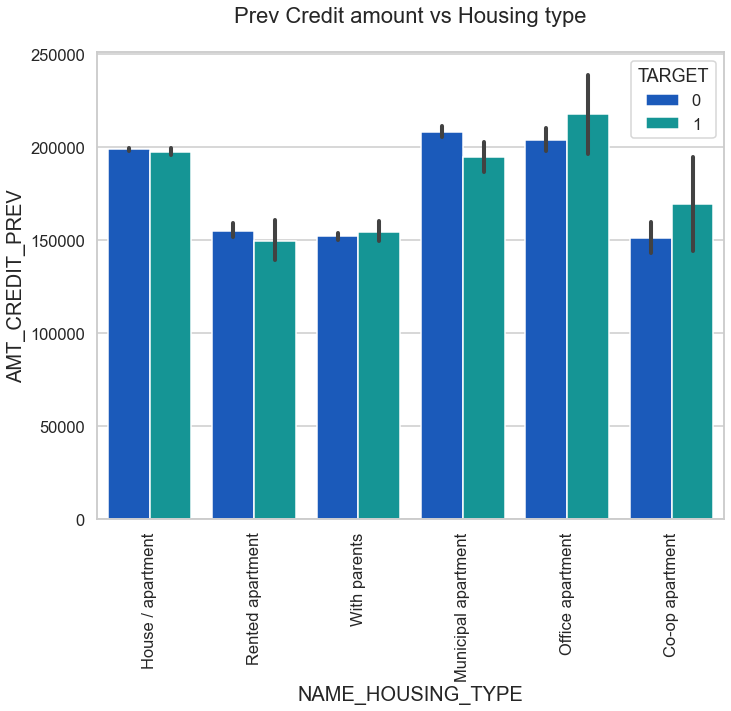

In [95]:
## Creating a bar plot for analysing Credit amount Vs housing type
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merge1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',palette="winter")
plt.title('Prev Credit amount vs Housing type')
plt.show()

Office appartment is having higher credit for target 0 
Co-op apartment is having higher credit of target 1

So, we can infer that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment

### CONCLUSION


- The clients with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.
- The percentage of people who have non-defaulters are 92% and defaulters are 8%.
- Education plays a major role in defaulting the loan: -
    - Education type ‘Lower Secondary’ – likely to default.
    - Higher education – less likely to default.
- Clients who are not revealing the goal of loan – likely to default.
- The bank lends more to female clients as cash loans.
- The majority of non-defaulters are clients who are having higher income and having higher amount of loans.
